## Problem Statement: Ensemble Techniques

* **DOMAIN**: Telecom
* **CONTEXT**: A telecom company wants to use their historical customer data and leverage machine learning to predict behaviour in an attempt to retain customers. The end goal is to develop focused customer retention programs 
* **DATA DESCRIPTION**: Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:
    * Customers who left within the last month – the column is called Churn
    * Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    * Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    * Demographic info about customers – gender, age range, and if they have partners and dependents
* **PROJECT OBJECTIVE**: The objective, as a data scientist hired by the telecom company, is to build a model that will help to identify the potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer churn and will increase the focus on strategising customer retention.

In [1]:
import numpy as np

import pandas as pd

#

import warnings; warnings.simplefilter('ignore')

# 
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

#
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import plotly.express as px
pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

In [2]:
churn1=pd.read_csv('TelcomCustomer-Churn_1.csv')

In [3]:
churn1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [4]:
churn1.shape

(7043, 10)

In [5]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [6]:
churn2=pd.read_csv('TelcomCustomer-Churn_2.csv')

In [7]:
churn2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
churn2.shape

(7043, 12)

In [9]:
churn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB


In [10]:
df=churn1.merge(churn2, on='customerID')

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.shape

(7043, 21)

In [13]:
#Getting the unique list of columns between churn1 and churn2
merged_columns = (churn1.columns) | (churn2.columns)
print(merged_columns)

Index(['Churn', 'Contract', 'Dependents', 'DeviceProtection',
       'InternetService', 'MonthlyCharges', 'MultipleLines', 'OnlineBackup',
       'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PaymentMethod',
       'PhoneService', 'SeniorCitizen', 'StreamingMovies', 'StreamingTV',
       'TechSupport', 'TotalCharges', 'customerID', 'gender', 'tenure'],
      dtype='object')


In [14]:
#getting the column list of the merged dataframe
df_cols=df.columns
print(df_cols)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


#### Method1

In [15]:
if  sorted(merged_columns.to_list()) == sorted(df.columns.to_list()):
    print("All columns are incorporated from churn1 and churn2 dataframes to the merged dataframe df")
else:
    print("All columns are NOT incorporated from churn1 and churn2 dataframes to the merged dataframe df")

All columns are incorporated from churn1 and churn2 dataframes to the merged dataframe df


#### Method2

In [16]:
common_columns = df_cols.intersection(merged_columns)
diff_columns = merged_columns.difference(df_cols)
print('The common columns between the merged data frame (df) and intersection of churn1 and churn2 dataframes are: \n',common_columns.to_list())
print('\nThe columns that are not incorporated from churn1 and churn2 dataframes to the merged dataframe df are: ',diff_columns.to_list())

The common columns between the merged data frame (df) and intersection of churn1 and churn2 dataframes are: 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

The columns that are not incorporated from churn1 and churn2 dataframes to the merged dataframe df are:  []


**So we see that all the columns have been incorporated from churn1 and churn2 dataframes to the merged dataframe 'df'**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**There are no null values in the dataframe**

In [19]:
df.duplicated().sum()

0

**There are no duplicate rows in the dataframe**

In [20]:
for col in df.columns:
    print('\nUnique values in column {0} are: \n{1}\n'.format(col,df[col].value_counts()))


Unique values in column customerID are: 
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Unique values in column gender are: 
Male      3555
Female    3488
Name: gender, dtype: int64


Unique values in column SeniorCitizen are: 
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


Unique values in column Partner are: 
No     3641
Yes    3402
Name: Partner, dtype: int64


Unique values in column Dependents are: 
No     4933
Yes    2110
Name: Dependents, dtype: int64


Unique values in column tenure are: 
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Unique values in column PhoneService are: 
Yes    6361
No      682
Name: PhoneService, dtype: int64


Unique values in column MultipleLines are: 
No             

In [21]:
df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

**We see TotalCharges feature has 11 empty values**

In [22]:
df.TotalCharges.value_counts()[' ']

11

**TotalCharges column has 11 entries with a single space. Replacing these with np.nan**

In [23]:
df.TotalCharges=df.TotalCharges.replace(r' ',np.nan,regex=True)

In [24]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Now we see there are 11 null values in TotalCharges column. Converting TotalCharges column to Float**

In [25]:
df['TotalCharges']=df['TotalCharges'].astype('float64')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Imputing null values in TotalCharges column with mean value of the column**

In [27]:
df['TotalCharges'].fillna(df.TotalCharges.mean(), inplace=True)

In [28]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**SeniorCitizen is a categorical feature, but its data type is Integer. For visualization in pie-chart we'll update the SeniorCitizen column data type to object and then update the values 0 as 'No' and 1 as 'Yes'**

In [30]:
df.SeniorCitizen=df.SeniorCitizen.astype('object')

In [31]:
df.SeniorCitizen.replace(0,'No',inplace=True)
df.SeniorCitizen.replace(1,'Yes',inplace=True)

In [32]:
df.SeniorCitizen.value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

**Converting all the object columns to categorical columns**

In [33]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature])
df.head(10)
df.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [34]:
#Defining Function to take any DataFrame as input and drawing pie-charts
def df_pie_chart(dataframe):
    col_count=len(dataframe.select_dtypes(include=['category']).columns) #counting the categorical columns
    for col in dataframe.columns:
        if col == 'customerID':
            col_count=col_count-1 #Excluding the 'customerID' column
            
    if col_count%2 == 1: #Initializing the number of rows for the sub-plots
        nrows=(col_count//2)+1
    else:
        nrows=(col_count//2)
    fig, axes = plt.subplots(nrows=nrows,ncols=2,figsize=(20,60)); #Initializing sub-plots of two columns
    if col_count%2 == 1:
        fig.delaxes(ax= axes[col_count//2,1]) #Deleting unused sub-axes if it exists
    plt.subplots_adjust(left=None, bottom=0.5, right=None, top=0.85, wspace=None, hspace=None); #Creating space between the sub-plots
    fig.tight_layout(pad=5)
    j=0
    for i, column in enumerate(dataframe.select_dtypes(include=['category'])): #Including only categorical columns for the pie-chart
        if column !='customerID': #Excluding the 'customerID' column
            total = dataframe[column].value_counts().values.sum();
            def fmt(x): #Defining function to include the count and percentage of the labels in the pie-chart
                return '{:.1f}%\n({:.0f})'.format(x, total*x/100);
            ax = axes[j // 2, j % 2];
            explode=np.arange(0,dataframe[column].nunique())
            _=ax.pie(labels=dataframe[column].value_counts().index, 
                     x=dataframe[column].value_counts(),
                     startangle=60,
                     autopct=fmt,
                     radius=1.1,
                     textprops={'fontsize':15},
                     explode=explode/10); #Pie-plot of individual columns
            _=ax.set_title("Pie-Chart for Feature: {0}".format(column),fontsize=18);
            j=j+1
    title = fig.suptitle('Pie-Chart for the Categorical Variables of the dataset',fontsize=30,y=1.01)

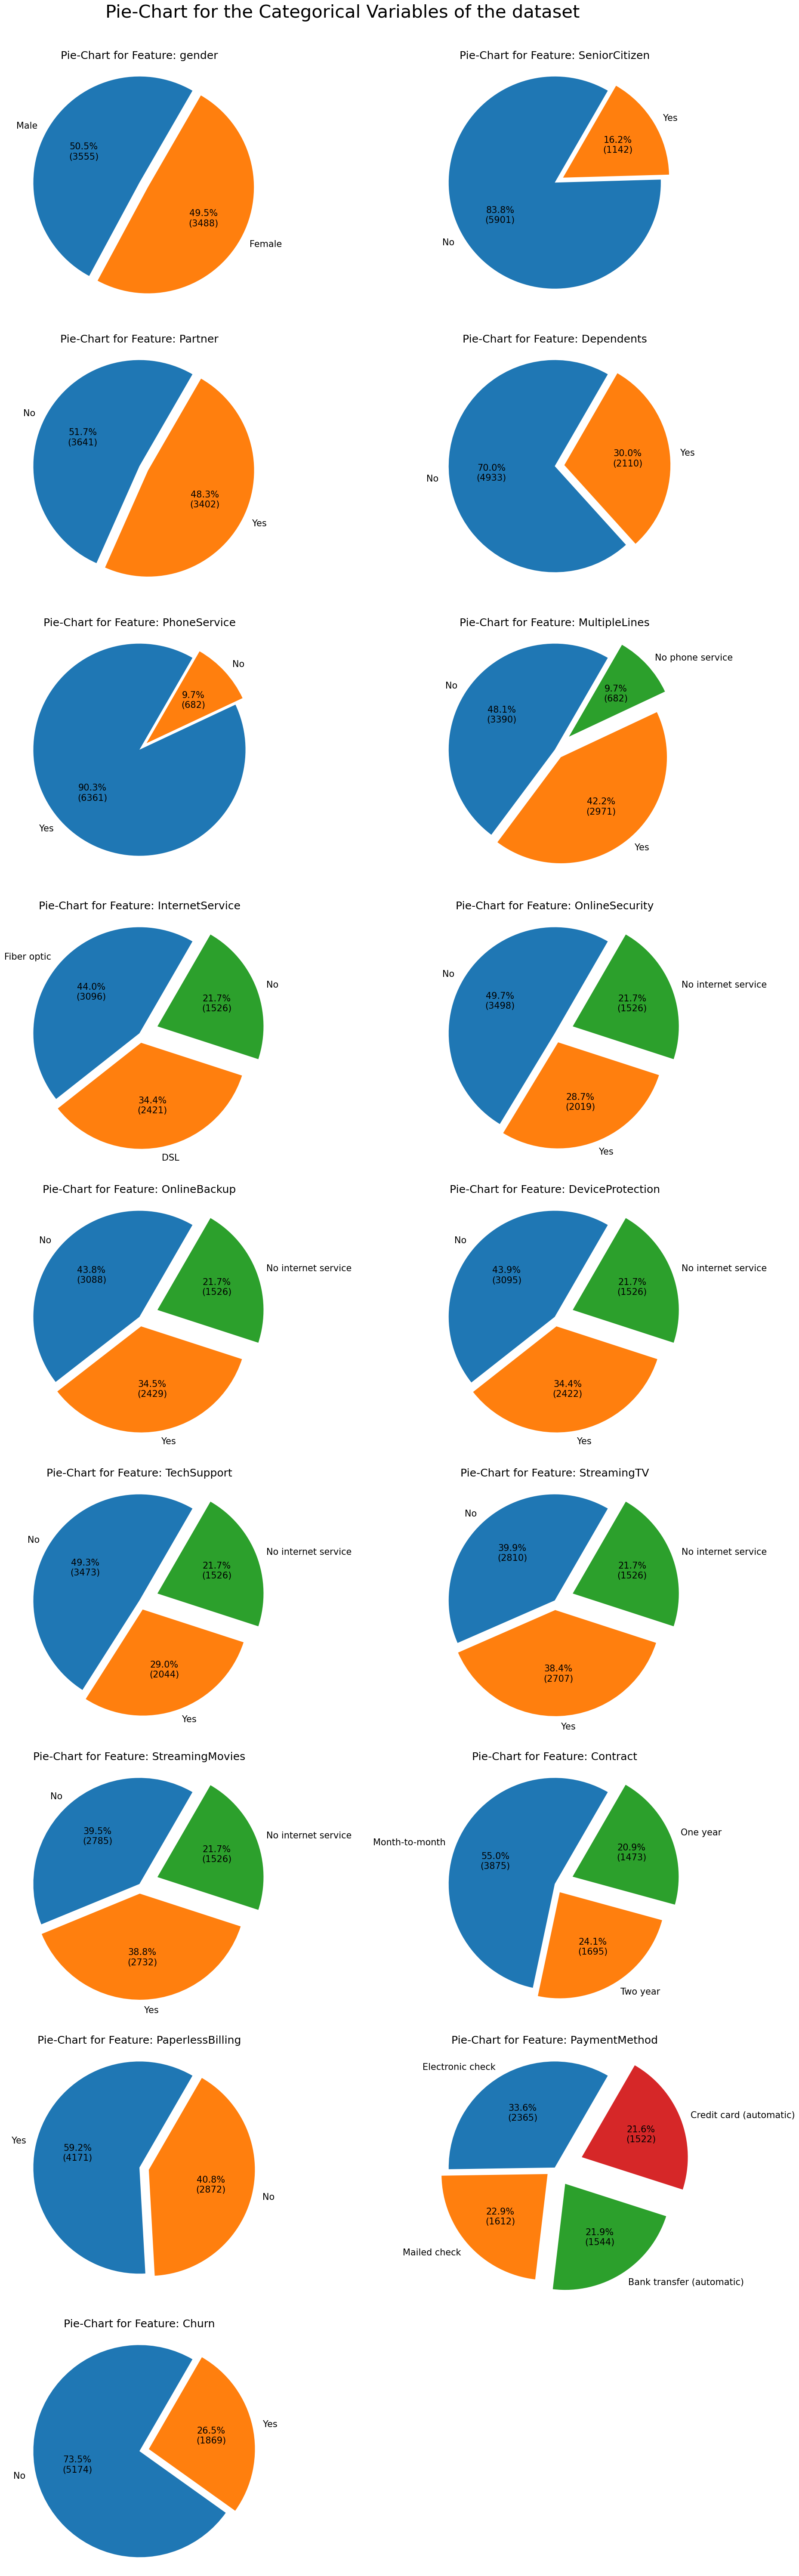

In [35]:
#Applying the function to the current data-frame
df_pie_chart(df)

**Summary of the categorical features from the pie-charts:**
        
**1. gender**
- The column 'gender' has only two possible values
- Out of the total 7043, 3555 or 50.5% customers are Male
- 3488 or 49.5% customers are female

**2. SeniorCitizen**
- Out of the total 7043, 1142 or 16.2% customers are Senior Citizens
- 5901 or 83.8% customers are Not Senior Citizens

**3. Partner**
- Out of the total 7043, 3641 or 51.7% customers dont have Partners
- 3402 or 48.3% customers have Partners

**4. Dependents**
- Out of the total 7043, 4933 or 70% customers dont have dependents
- 2110 or 30% customers have dependents

**5. PhoneService**
- Out of the total 7043, 6361 or 90.3% customers use the Phone Service
- 682 or 9.7% customers dont use the Phone Service

**6. MultipleLines**
- Out of the total 7043, 682 or 9.7% customers dont use the Phone Service and hence dont have multiple lines
- 3390 or 48.1% customers use Phone Service but dont have multiple lines
- 2971 or 42.2% customers use phone service with multiple lines

**7. InternetService**
- Out of the total 7043, 1526 or 21.7% customers dont use Internet Service
- 3096 or 44% customers use Fiber Optic based Internet Service
- 2421 or 34.4% customers use DSL based Internet Service

**8. OnlineSecurity**
- Out of the total 7043, 1526 or 21.7% customers dont use Internet Service
- 3498 or 49.7% customers dont use Online Security service
- 2019 or 28.7% customers use Online Security Service

**9. OnlineBackup**
- Out of the total 7043, 1526 or 21.7% customers dont use Internet Service
- 3088 or 43.8% customers dont use Online Backup service
- 2429 or 34.5% customers use Online Backup Service

**10. DeviceProtection**
- Out of the total 7043, 1526 or 21.7% customers dont use Internet Service
- 3095 or 43.9% customers dont use Device Protection service
- 2422 or 34.4% customers use Device Protection Service

**11. TechSupport**
- Out of the total 7043, 1526 or 21.7% customers dont use Internet Service
- 3473 or 49.3% customers dont use Tech Support service
- 2044 or 29% customers use Tech Support Service

**12. StreamingTV**
- Out of the total 7043, 1526 or 21.7% customers dont use Internet Service
- 2810 or 39.3% customers dont use Streaming TV service
- 2707 or 38.4% customers use Streaming TV Service

**13. StreamingMovies**
- Out of the total 7043, 1526 or 21.7% customers dont use Internet Service
- 2785 or 39.5% customers dont use Streaming Movies service
- 2732 or 38.8% customers use Streaming Movies Service

**14. Contract**
- Out of the total 7043, 3875 or 55% customers have Month-to-Month contract
- 1473 or 20.9% customers have One year contract
- 1695 or 24.1% customers use Two year contract

**15. PaperlessBilling**
- Out of the total 7043, 2872 or 40.8% customers have not opted for Paperless Billing
- 4171 or 59.2% customers have opted for Paperless Billing

**16. PaymentMethod**
- Out of the total 7043, 1522 or 21.6% customers have opted for Automatic Credit Card payment
- 1544 or 21.9% customers have opted for Automatic Bank transfer payment
- 1612 or 22.9% customers  have opted for Mailed Check payment
- 2365 or 33.6% customers have opted for Electronic Check payment

**17. Churn**
- Out of the total 7043, 5174 or 73.5% customers have Not Churned
- 1869 or 26.5% customers have Churned
- Churn is our target variable and it has imbalanced class distribution with 73.5% 'No Churn' class, and 26.5% 'Churn' class
- But this imbalance is not too high and we need not apply class balancing techniques like SMOTE

**Now we'll apply EDA and visualization on the dataset**

In [36]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00
mean,32.37,64.76,2283.30
std,24.56,30.09,2265.00
min,0.00,18.25,18.80
25%,9.00,35.50,402.23
50%,29.00,70.35,1400.55
75%,55.00,89.85,3786.60
max,72.00,118.75,8684.80


In [37]:
df.duplicated().sum()

0

In [38]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [39]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

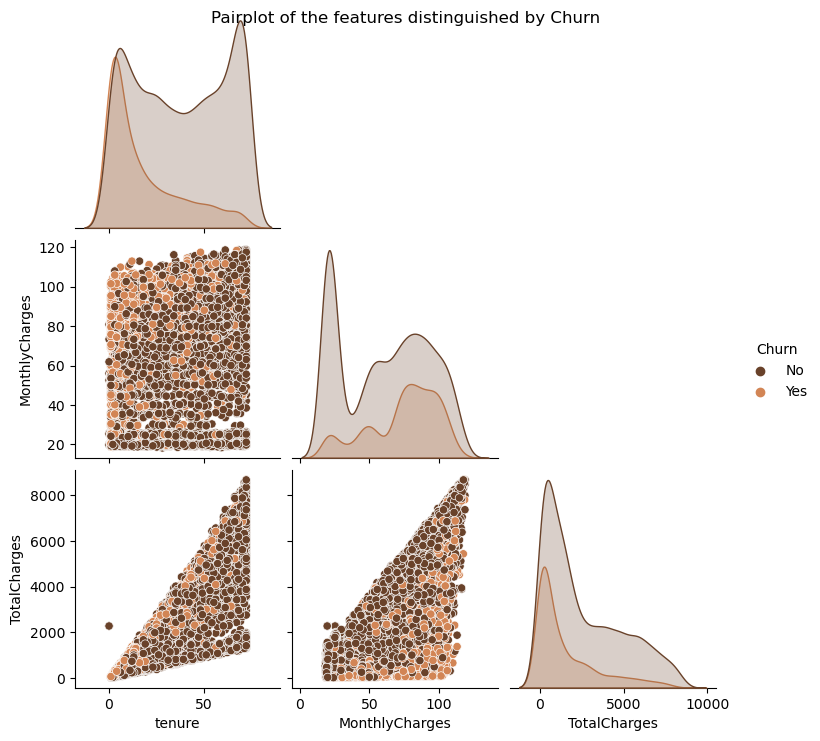

In [40]:
col_list=['tenure', 'MonthlyCharges', 'TotalCharges']
pp=sns.pairplot(data=df,vars=col_list, hue='Churn',palette = 'copper', corner=True);
pp.fig.suptitle('Pairplot of the features distinguished by Churn')
plt.show();

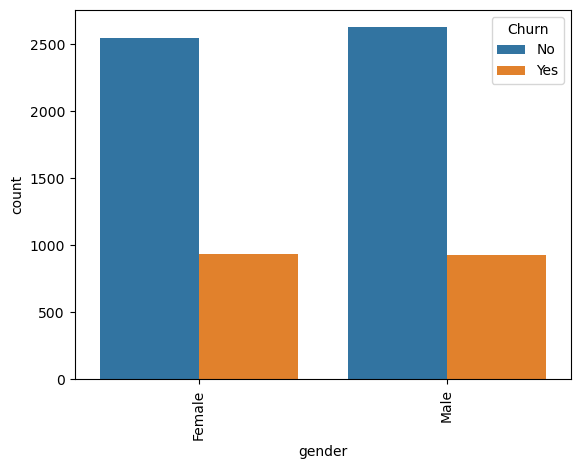

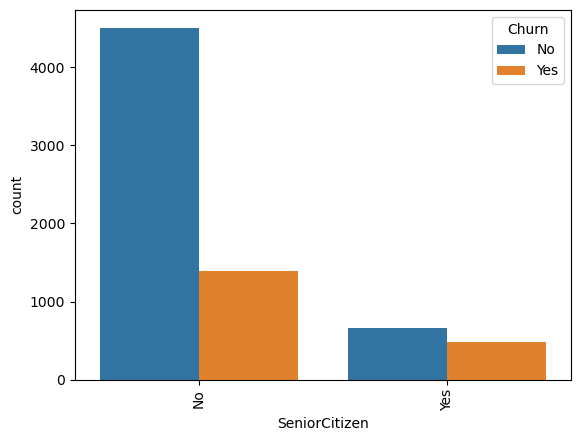

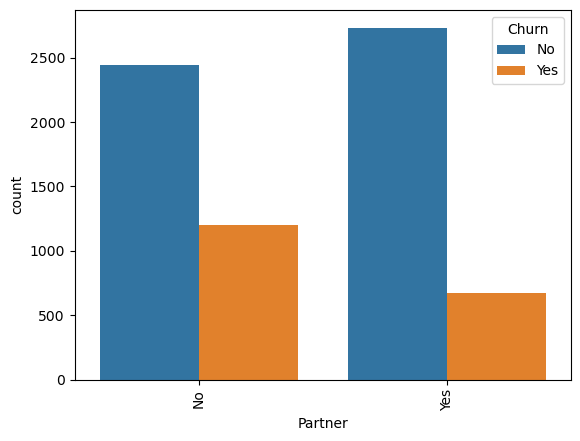

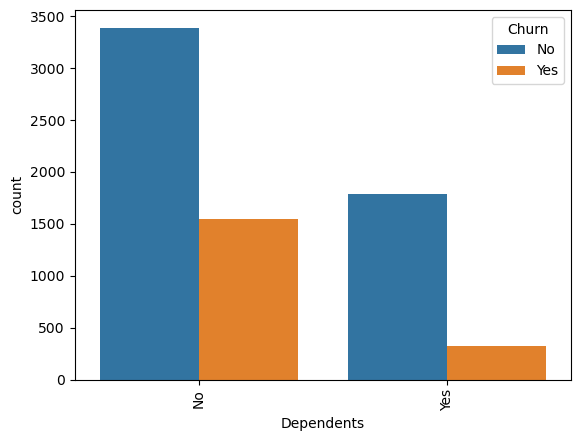

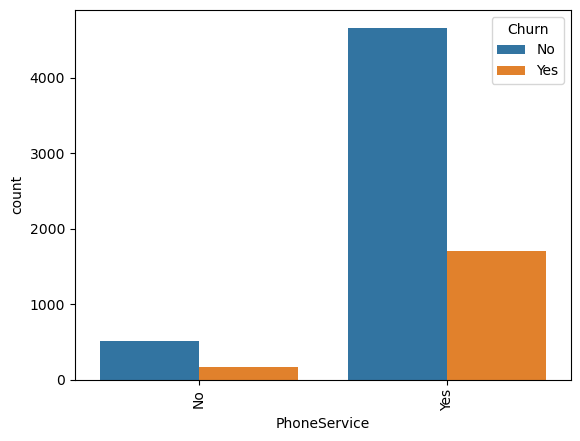

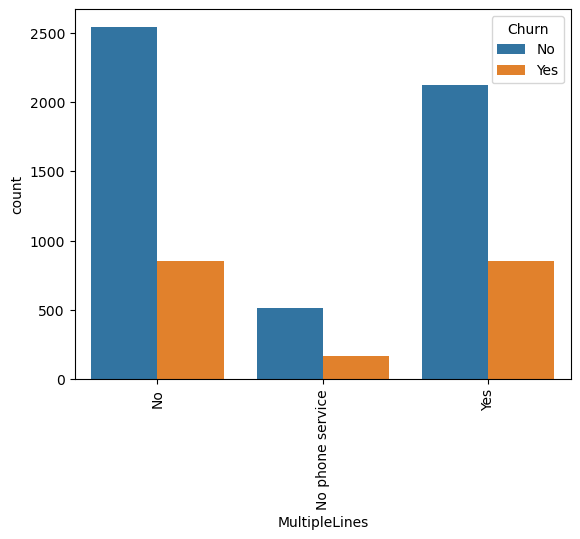

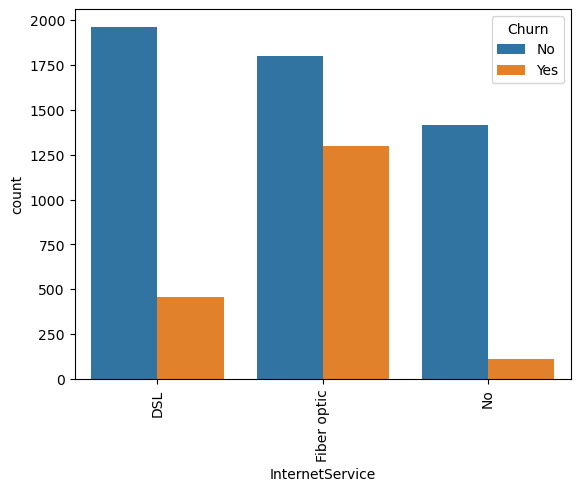

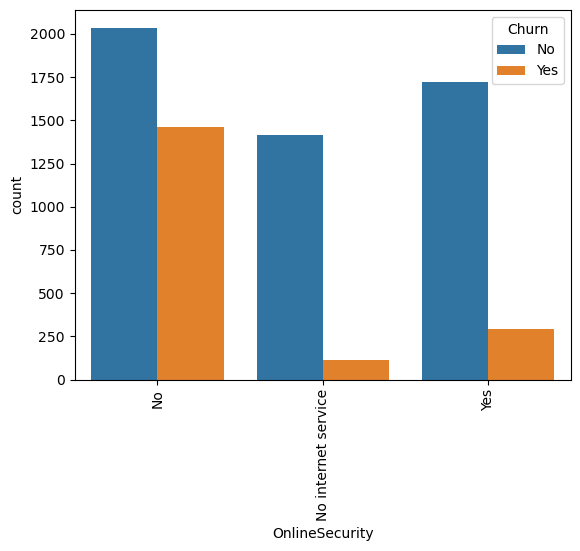

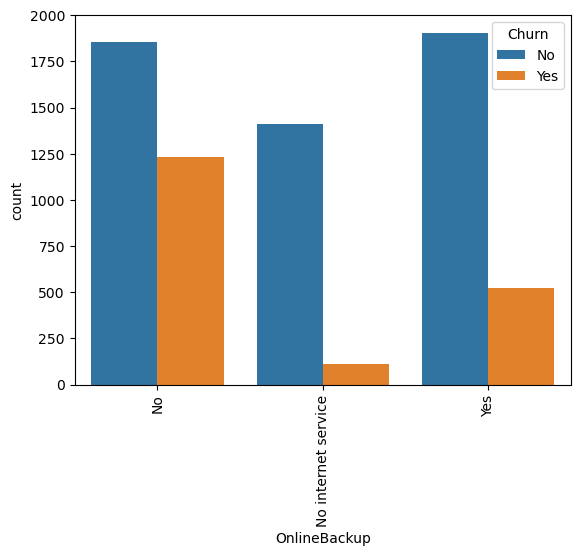

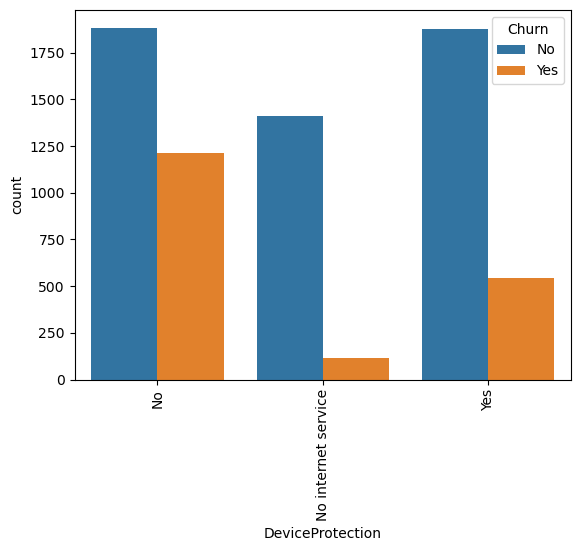

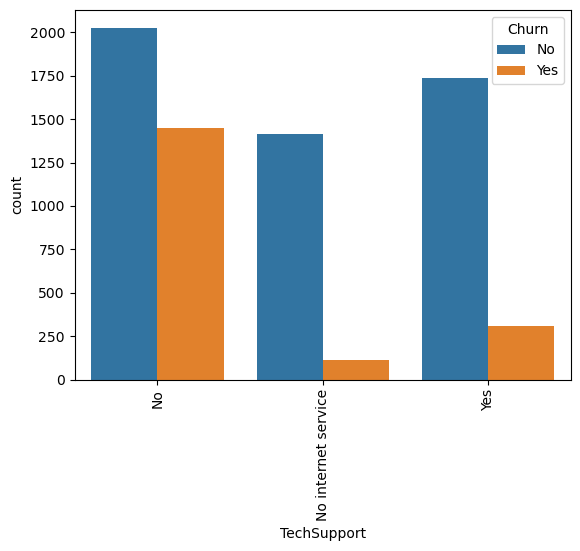

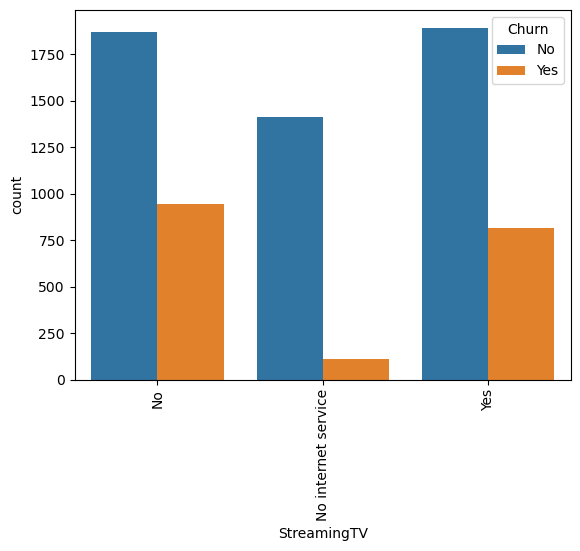

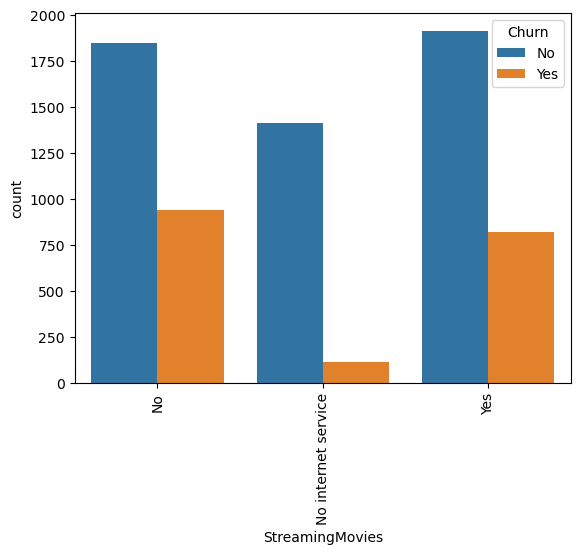

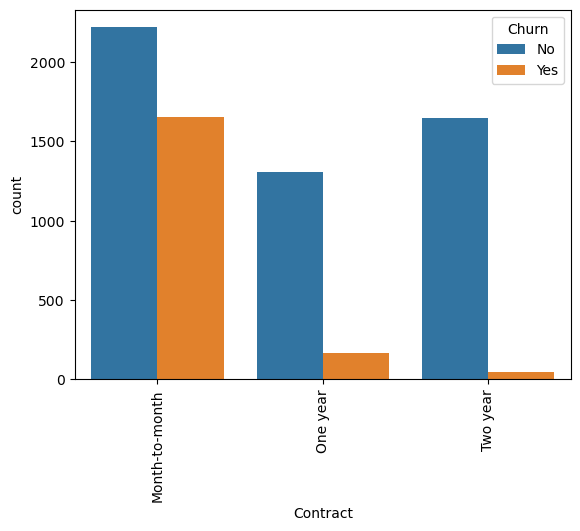

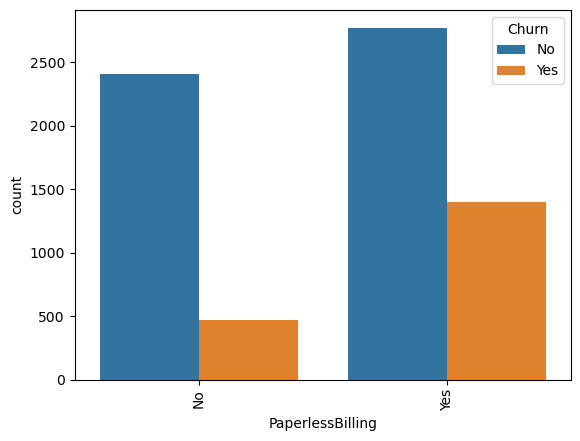

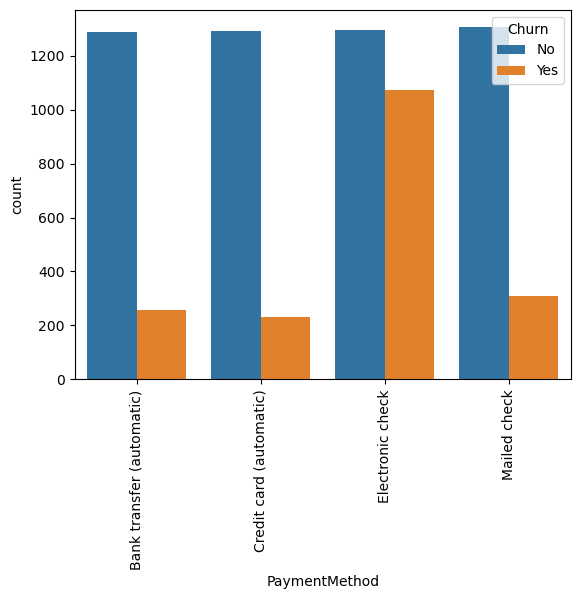

In [41]:
for feature in df.columns:
    if df[feature].dtype=='category' and feature != 'customerID'  and feature != 'Churn':
        _=sns.countplot(x=feature, hue='Churn', data=df)
        _=plt.xticks(rotation=90);
        plt.show()

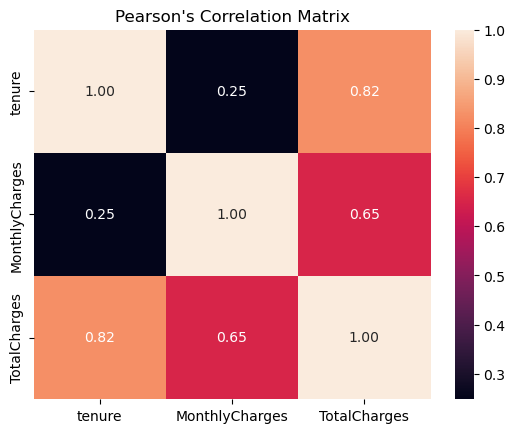

In [42]:
corr = df.corr(numeric_only=True)

#mask = np.triu(np.ones_like(corr, dtype=bool))

#plt.figure(figsize=(6, 3))
sns.heatmap(corr, annot=True, fmt=".2f", linecolor="c");
plt.title("Pearson's Correlation Matrix");
plt.show();

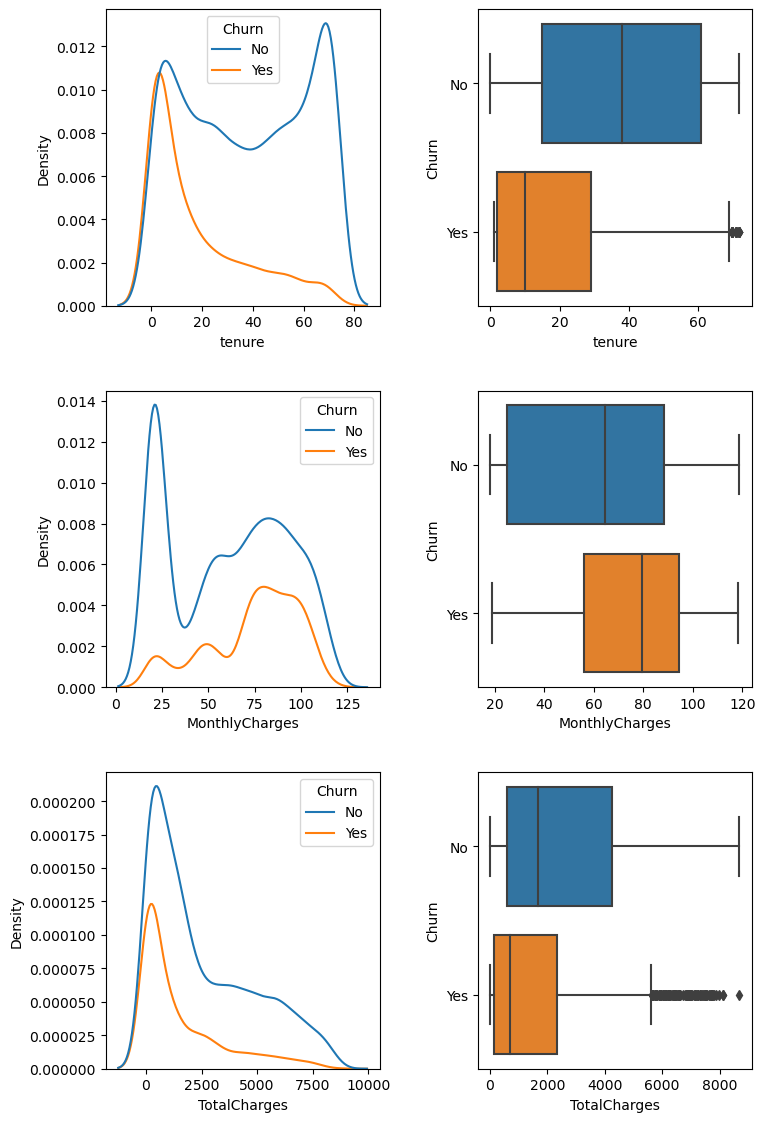

In [43]:
num_cols = df.select_dtypes("number")
fig, axes = plt.subplots(
    nrows=3,
    ncols=2,
    figsize=(8, 12)
)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5); #Creating space between the sub-plots
fig.tight_layout(pad=4)
j=0
for i, feature in enumerate(num_cols.columns):
    ax = axes[i, j % 2];
    _=sns.kdeplot(data=df,x=feature,hue='Churn',ax=ax)
    
    ax = axes[i, ++1];
    _=sns.boxplot(data=df,x=feature,y='Churn',ax=ax)
    j=j+2

**Based on the EDA and visualizations we an see that:**
- Customers with month-to-month contract have higher churn than customers with one or two year contract
- Customers with low tenures have higher rate of churn
- Customers with higher monthly charges are more likely to churn
- Total Charges does not seem to have high impact on the churn rate
- Senior Citizen have higher rate of churn compared to non-senior citizen
- Customers having Fiber-optic for Internet Service have higher rate of churn compared to others who have other form of internet service
- Customers having no online security, online backup, device protection or tech support have higher rate of churn compared to others who have no internet services or who have opted for these services
- Customers who have opted for electronic check as payment mode have higher churn rate compared to customers who have other payment methods

**We'll do order based encoding for the following columns, as order matters for these columns**
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- Churn

**We'll do one-hot encoding for the following columns**
- gender
- SeniorCitizen
- Partner
- Dependents
- PaymentMethod

In [44]:
#One hot encoding is not used for columns in replaceStruct because for these variables, ordering matters.

replaceStruct = {
                 "PhoneService": {"No": 0, "Yes": 1},
                 "MultipleLines": {"No phone service": 0, "No": 1, "Yes": 2},
                 "InternetService": {"No": 0, "DSL": 1, "Fiber optic": 2},
                 "OnlineSecurity": {"No internet service": 0, "No": 1, "Yes": 2},
                 "OnlineBackup": {"No internet service": 0, "No": 1, "Yes": 2},
                 "DeviceProtection": {"No internet service": 0, "No": 1, "Yes": 2},
                 "TechSupport": {"No internet service": 0, "No": 1, "Yes": 2},
                 "StreamingTV": {"No internet service": 0, "No": 1, "Yes": 2},
                 "StreamingMovies": {"No internet service": 0, "No": 1, "Yes": 2},
                 "Contract": {"Month-to-month": 0, "One year": 1, "Two year": 2},
                 "PaperlessBilling": {"No": 0, "Yes": 1},
                 "Churn":  {"No": 0, "Yes": 1}
                    }

oneHotCols=["gender","SeniorCitizen","Partner","Dependents", "PaymentMethod"]

In [45]:
df_encoded=df.copy(deep=True)

In [46]:
#Encoding the columns

df_encoded=df_encoded.replace(replaceStruct)
df_encoded=pd.get_dummies(df_encoded, columns=oneHotCols)

In [47]:
df_encoded.head(10).T

,0,1,2,3,4,5,6,7,8,9
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU
tenure,1,34,2,45,2,8,22,10,28,62
PhoneService,0,1,1,0,1,1,1,0,1,1
MultipleLines,0,1,1,0,1,2,2,0,2,1
InternetService,1,1,1,1,2,2,2,1,2,1
OnlineSecurity,1,2,2,2,1,1,1,2,1,2
OnlineBackup,2,1,2,1,1,1,2,1,1,2
DeviceProtection,1,2,1,2,1,2,1,1,2,1
TechSupport,1,1,1,2,1,1,1,1,2,1
StreamingTV,1,1,1,1,1,2,2,1,2,1


**We'll drop the customerID column for the X dataset, and Churn will be the y variable**

In [48]:
X=df_encoded.drop(['customerID','Churn'],axis=1) 
y=df_encoded[['Churn']]

**We'll normalize the following columns using zscore scaling**
- tenure
- MonthlyCharges
- TotalCharges

In [49]:
from scipy import stats
selected_columns = ['tenure','MonthlyCharges','TotalCharges']
z_scores = stats.zscore(X[selected_columns])
scaled_df = pd.DataFrame(z_scores, columns=selected_columns)
X[selected_columns] = scaled_df

**Now we'll split the data into Train and Test set**

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.20)
X_train.head()
y_train.head()

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1814,-0.83,1,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
5946,0.39,1,1,1,2,2,2,2,1,2,...,1,0,1,0,1,0,0,1,0,0
3881,1.57,1,2,1,2,2,1,2,1,1,...,1,0,0,1,1,0,1,0,0,0
2389,1.57,1,2,1,2,1,2,2,2,2,...,1,0,0,1,0,1,0,0,1,0
3676,-0.10,1,1,1,2,2,1,2,2,1,...,1,0,1,0,1,0,0,0,1,0


,Churn
1814,0
5946,1
3881,0
2389,0
3676,0


In [51]:
from sklearn.tree import DecisionTreeClassifier

#Training a decision tree with default values
dTree = DecisionTreeClassifier(random_state=9)
dTree.fit(X_train, y_train)

y_predict_test=dTree.predict(X_test)
y_predict_train=dTree.predict(X_train)

DecisionTreeClassifier(random_state=9)

In [52]:
dTree.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 9,
 'splitter': 'best'}

**Feature Importance**

                                    Feature  Feature_Importance
13                             TotalCharges                0.20
12                           MonthlyCharges                0.20
10                                 Contract                0.17
0                                    tenure                0.09
3                           InternetService                0.05
4                            OnlineSecurity                0.02
11                         PaperlessBilling                0.02
5                              OnlineBackup                0.02
14                            gender_Female                0.02
24           PaymentMethod_Electronic check                0.02
15                              gender_Male                0.02
7                               TechSupport                0.02
25               PaymentMethod_Mailed check                0.02
18                               Partner_No                0.01
9                           StreamingMov

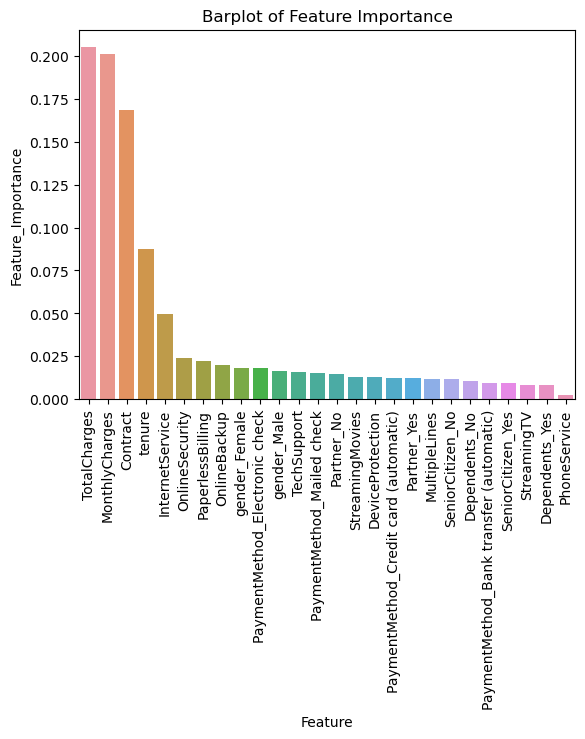

In [53]:
dTree_FI=pd.DataFrame({'Feature':X_train.columns,'Feature_Importance':dTree.feature_importances_}).sort_values(by="Feature_Importance",ascending=False)
print (dTree_FI)
sns.barplot(data=dTree_FI,x='Feature',y='Feature_Importance');
plt.title('Barplot of Feature Importance');
plt.xticks(rotation=90);

**As per the Decision Tree model the following features have significant impact on customer churn in the order as below**:
- Total Charges
- Monthly Charges
- Contract
- Tenure

In [54]:
print('The score of the model on training data is: {0:0.2f}'.format(dTree.score(X_train, y_train)));
print('The score of the model on test data is: {0:0.2f}'.format(dTree.score(X_test, y_test)));

The score of the model on training data is: 1.00
The score of the model on test data is: 0.73


**The accuracy of the model o training data is 100%, but on test data is only 73%. So it is an overfitting model**

**Confusion Matrix for Training Data:**

<Figure size 700x500 with 0 Axes>

<Axes: >

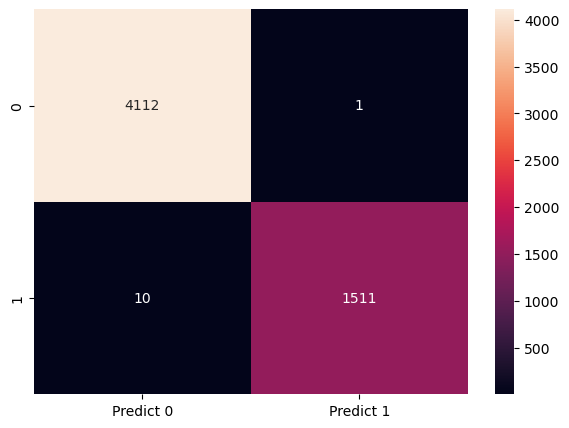

In [55]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_train, y_predict_train, labels=[0,1])

df_cm_train = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_train, annot=True,fmt='g')

**Confusion Matrix for Testing Data:**

<Figure size 700x500 with 0 Axes>

<Axes: >

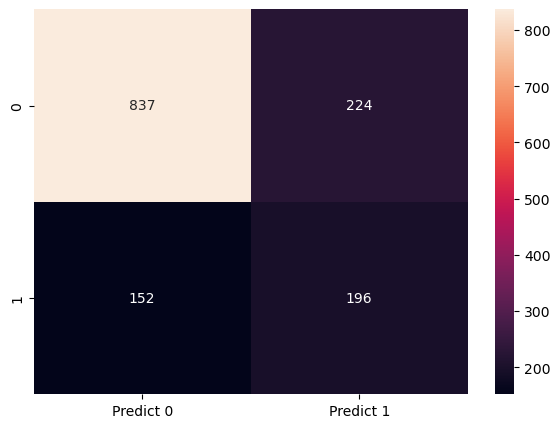

In [56]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict_test, labels=[0,1])

df_cm_test = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_test, annot=True,fmt='g')

**Classification Report for Training data**

In [57]:
print("Classification  Report for the Model on Training data:\n",metrics.classification_report(y_train,y_predict_train))

Classification  Report for the Model on Training data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4113
           1       1.00      0.99      1.00      1521

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



**Classification Report for Testing data**

In [58]:
print("Classification  Report for the Model:\n",metrics.classification_report(y_test,y_predict_test))

Classification  Report for the Model:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      1061
           1       0.47      0.56      0.51       348

    accuracy                           0.73      1409
   macro avg       0.66      0.68      0.66      1409
weighted avg       0.75      0.73      0.74      1409



**Accuracy**

In [59]:
dTree_score_test=dTree.score(X_test,y_test)
dTree_score_train=dTree.score(X_train,y_train)
print('Accuracy of the model on train data is: {0:0.2f}'.format(dTree_score_train))
print('Accuracy of the model on test data is: {0:0.2f}'.format(dTree_score_test))

Accuracy of the model on train data is: 1.00
Accuracy of the model on test data is: 0.73


**Precision**

In [60]:
dTree_Prec_test = metrics.precision_score(y_test,y_predict_test)
dTree_Prec_train = metrics.precision_score(y_train,y_predict_train)
print('The precision of the model on train data is : {0:0.2f}'.format(dTree_Prec_train))
print('The precision of the model on test data is : {0:0.2f}'.format(dTree_Prec_test))

The precision of the model on train data is : 1.00
The precision of the model on test data is : 0.47


**Recall**

In [61]:
dTree_Recall_train = metrics.recall_score(y_train,y_predict_train)
dTree_Recall_test = metrics.recall_score(y_test,y_predict_test)
print('The Sensitivity of the model on train data is : {0:0.2f}'.format(dTree_Recall_train))
print('The Sensitivity of the model on test data is : {0:0.2f}'.format(dTree_Recall_test))

The Sensitivity of the model on train data is : 0.99
The Sensitivity of the model on test data is : 0.56


**F1-Score**

In [62]:
dTree_f1score_train = metrics.f1_score(y_train,y_predict_train)
dTree_f1score_test = metrics.f1_score(y_test,y_predict_test)
print('The f1-score of the model on train data is : {0:0.2f}'.format(dTree_f1score_train))
print('The f1-score of the model on test data is : {0:0.2f}'.format(dTree_f1score_test))

The f1-score of the model on train data is : 1.00
The f1-score of the model on test data is : 0.51


In [63]:
print('Churn value 0 forms {0:.2f}% of entries in the training data'.format(y_train.value_counts()[0]*100/len(y_train)))
print('Churn value 1 forms {0:.2f}% of entries in the training data'.format(y_train.value_counts()[1]*100/len(y_train)))

Churn value 0 forms 73.00% of entries in the training data
Churn value 1 forms 27.00% of entries in the training data


**The dataset is imbalaced with 73% entries without churn, and 27% entries with churn. But this imbalance is not extremely high, and hence balancing of data is not required**

In [64]:
import time
start=time.time()

#setting the Hyperparameters range
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
skf = StratifiedKFold(n_splits=10)

criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = list(np.arange(4,10,1))
min_samples_split = list(np.arange(40,80,2))
min_samples_leaf = list(np.arange(20,30,2))


#Initializing the hyperparameters dictionary
hyperparameters_dTree = dict(criterion=criterion,
                           splitter=splitter,
                           max_depth=max_depth,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf
                            )

dTree_tuned = DecisionTreeClassifier(random_state=9)
dTree_tuned_model = GridSearchCV(dTree_tuned, 
                                 hyperparameters_dTree, 
                                 refit = True, 
                                 verbose = 3, 
                                 n_jobs=-1, 
                                 cv=skf)
best_model_dTree = dTree_tuned_model.fit(X_train,y_train)
best_model_dTree.best_score_
end=time.time()
print('time in minutes: ',(end-start)/60)

Fitting 10 folds for each of 3600 candidates, totalling 36000 fits


0.7949910560195508

time in minutes:  4.281344258785248


In [65]:
best_model_dTree.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 24,
 'min_samples_split': 76,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 9,
 'splitter': 'random'}

**Feature Importance**

                                    Feature  Feature_Importance
10                                 Contract                0.54
3                           InternetService                0.13
0                                    tenure                0.10
13                             TotalCharges                0.06
6                          DeviceProtection                0.03
9                           StreamingMovies                0.02
24           PaymentMethod_Electronic check                0.02
8                               StreamingTV                0.02
2                             MultipleLines                0.02
4                            OnlineSecurity                0.01
17                        SeniorCitizen_Yes                0.01
22  PaymentMethod_Bank transfer (automatic)                0.01
7                               TechSupport                0.01
11                         PaperlessBilling                0.01
15                              gender_M

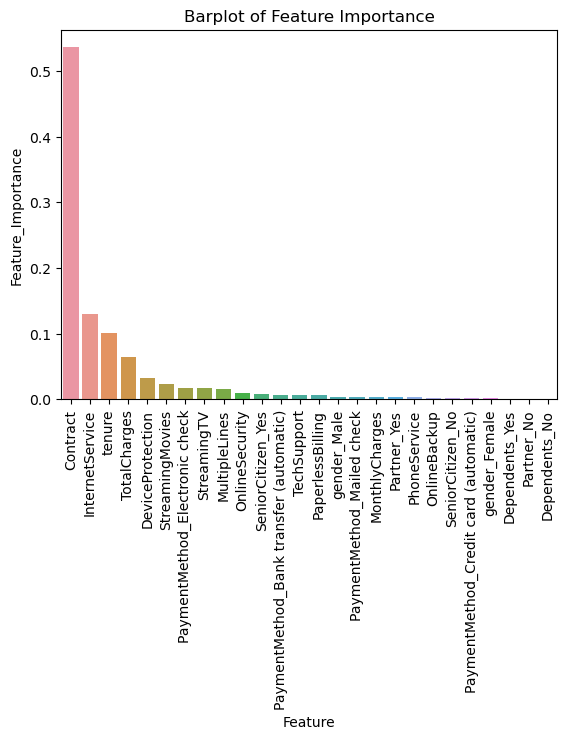

In [66]:
dTree_tuned_FI=pd.DataFrame({'Feature':X_train.columns,'Feature_Importance':best_model_dTree.best_estimator_.feature_importances_}).sort_values(by="Feature_Importance",ascending=False)
print (dTree_tuned_FI)
sns.barplot(data=dTree_tuned_FI,x='Feature',y='Feature_Importance');
plt.title('Barplot of Feature Importance');
plt.xticks(rotation=90);

**As per the Tuned Decision Tree model the following features have significant impact on customer churn in the order as below**:
- Contract
- Internet Service
- Tenure

In [67]:
tuned_dTree_score_test=best_model_dTree.score(X_test,y_test)
tuned_dTree_score_train=best_model_dTree.score(X_train,y_train)
print('Accuracy of the model on train data is: {0:0.2f}'.format(tuned_dTree_score_train))
print('Accuracy of the model on test data is: {0:0.2f}'.format(tuned_dTree_score_test))

Accuracy of the model on train data is: 0.81
Accuracy of the model on test data is: 0.80


In [68]:
y_pred_test_dTree_tuned=best_model_dTree.predict(X_test)
y_pred_train_dTree_tuned=best_model_dTree.predict(X_train)

**Confusion Matrix for Training Data:**

<Figure size 700x500 with 0 Axes>

<Axes: >

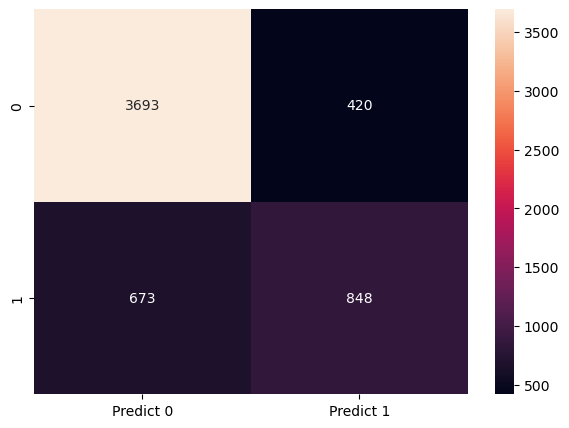

In [69]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_train, y_pred_train_dTree_tuned, labels=[0,1])

df_cm_train = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_train, annot=True,fmt='g')

**Confusion Matrix for Testing Data:**

<Figure size 700x500 with 0 Axes>

<Axes: >

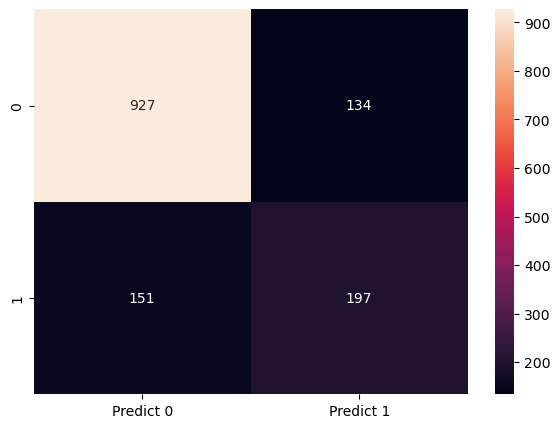

In [70]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred_test_dTree_tuned, labels=[0,1])

df_cm_test = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_test, annot=True,fmt='g')

**Classification Report for Training data**

In [71]:
print("Classification  Report for the Model on Training data:\n",metrics.classification_report(y_train,y_pred_train_dTree_tuned))

Classification  Report for the Model on Training data:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      4113
           1       0.67      0.56      0.61      1521

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634



**Classification Report for Testing data**

In [72]:
print("Classification  Report for the Model:\n",metrics.classification_report(y_test,y_pred_test_dTree_tuned))

Classification  Report for the Model:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      1061
           1       0.60      0.57      0.58       348

    accuracy                           0.80      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.79      0.80      0.80      1409



**Accuracy**

In [73]:
dTree_tuned_score_test=best_model_dTree.score(X_test,y_test)
dTree_tuned_score_train=best_model_dTree.score(X_train,y_train)
print('Accuracy of the model on train data is: {0:0.2f}'.format(dTree_tuned_score_train))
print('Accuracy of the model on test data is: {0:0.2f}'.format(dTree_tuned_score_test))

Accuracy of the model on train data is: 0.81
Accuracy of the model on test data is: 0.80


**Precision**

In [74]:
dTree_tuned_Prec_test = metrics.precision_score(y_test,y_pred_test_dTree_tuned)
dTree_tuned_Prec_train = metrics.precision_score(y_train,y_pred_train_dTree_tuned)
print('The precision of the model on train data is : {0:0.2f}'.format(dTree_tuned_Prec_train))
print('The precision of the model on test data is : {0:0.2f}'.format(dTree_tuned_Prec_test))

The precision of the model on train data is : 0.67
The precision of the model on test data is : 0.60


**Recall**

In [75]:
dTree_tuned_Recall_train = metrics.recall_score(y_train,y_pred_train_dTree_tuned)
dTree_tuned_Recall_test = metrics.recall_score(y_test,y_pred_test_dTree_tuned)
print('The Sensitivity of the model on train data is : {0:0.2f}'.format(dTree_tuned_Recall_train))
print('The Sensitivity of the model on test data is : {0:0.2f}'.format(dTree_tuned_Recall_test))

The Sensitivity of the model on train data is : 0.56
The Sensitivity of the model on test data is : 0.57


**F1-Score**

In [76]:
dTree_tuned_f1score_train = metrics.f1_score(y_train,y_pred_train_dTree_tuned)
dTree_tuned_f1score_test = metrics.f1_score(y_test,y_pred_test_dTree_tuned)
print('The f1-score of the model on train data is : {0:0.2f}'.format(dTree_tuned_f1score_train))
print('The f1-score of the model on test data is : {0:0.2f}'.format(dTree_tuned_f1score_test))

The f1-score of the model on train data is : 0.61
The f1-score of the model on test data is : 0.58


**Improvement in Decision Tree Model after hyperparameter tuning**

In [77]:
print('\033[1mImprovement in Decision Tree model performance on test data after tuning is as below:\033[0m\n')

print('Improvement in Accuracy = {0:0.2f}%'.format((dTree_tuned_score_test-dTree_score_test)*100/dTree_score_test))
print('\n******************************************\n')

print('Improvement in Precision is: {0:0.2f}'.format((dTree_tuned_Prec_test-dTree_Prec_test)*100/dTree_Prec_test))
    
print('\n******************************************\n')

print('Improvement in Recall is: {0:0.2f}'.format((dTree_tuned_Recall_test-dTree_Recall_test)*100/dTree_Recall_test))

print('\n******************************************\n')

print('Improvement in F1-Score is: {0:0.2f}'.format((dTree_tuned_f1score_test-dTree_f1score_test)*100/dTree_f1score_test))

Improvement in Decision Tree model performance on test data after tuning is as below:

Improvement in Accuracy = 8.81%

******************************************

Improvement in Precision is: 27.54

******************************************

Improvement in Recall is: 0.51

******************************************

Improvement in F1-Score is: 13.68


In [78]:
from sklearn.ensemble import RandomForestClassifier

#Training a Random Forest model with default values
rf = RandomForestClassifier(random_state=9)
rf.fit(X_train, y_train)

y_predict_test=rf.predict(X_test)
y_predict_train=rf.predict(X_train)

RandomForestClassifier(random_state=9)

In [79]:
rf.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 9,
 'verbose': 0,
 'warm_start': False}

**Feature Importance**

                                    Feature  Feature_Importance
13                             TotalCharges                0.19
12                           MonthlyCharges                0.16
0                                    tenure                0.16
10                                 Contract                0.07
3                           InternetService                0.04
24           PaymentMethod_Electronic check                0.04
4                            OnlineSecurity                0.03
7                               TechSupport                0.03
11                         PaperlessBilling                0.02
5                              OnlineBackup                0.02
2                             MultipleLines                0.02
6                          DeviceProtection                0.02
8                               StreamingTV                0.02
9                           StreamingMovies                0.02
15                              gender_M

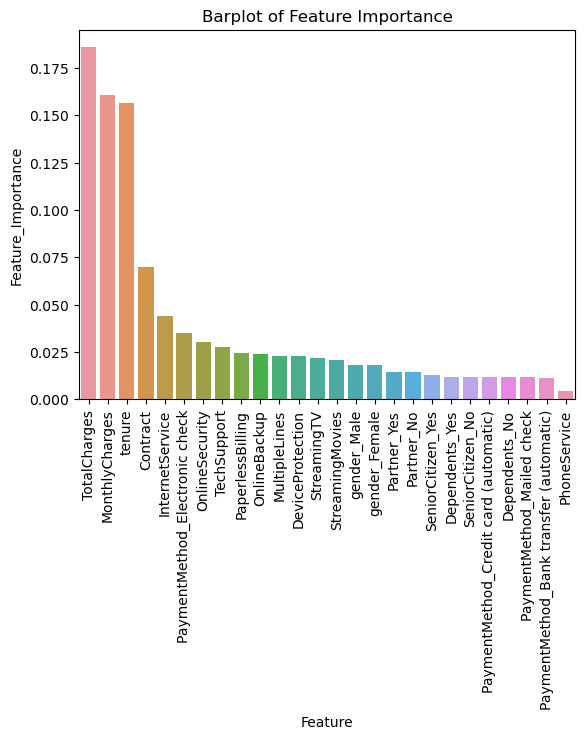

In [80]:
rf_FI=pd.DataFrame({'Feature':X_train.columns,'Feature_Importance':rf.feature_importances_}).sort_values(by="Feature_Importance",ascending=False)
print (rf_FI)
sns.barplot(data=rf_FI,x='Feature',y='Feature_Importance');
plt.title('Barplot of Feature Importance');
plt.xticks(rotation=90);

**As per the Random Forest model the following features have significant impact on customer churn in the order as below**:
- Total Charges
- Monthly Charges
- Tenure
- Contract

In [81]:
print('The score of the model on training data is: {0:0.2f}'.format(rf.score(X_train, y_train)));
print('The score of the model on test data is: {0:0.2f}'.format(rf.score(X_test, y_test)));

The score of the model on training data is: 1.00
The score of the model on test data is: 0.79


**The accuracy of the model o training data is 100%, but on test data is only 79%. So it is an overfitting model**

**Confusion Matrix for Training Data:**

<Figure size 700x500 with 0 Axes>

<Axes: >

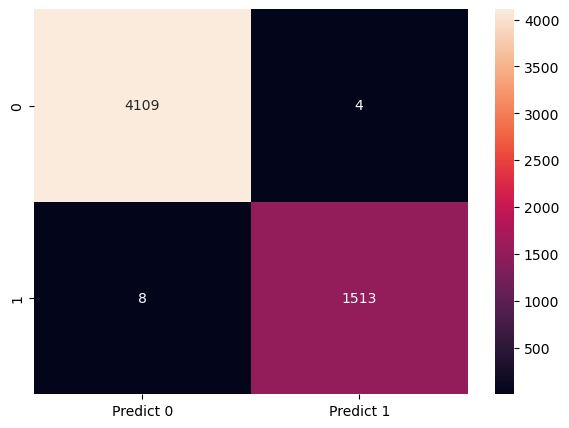

In [82]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_train, y_predict_train, labels=[0,1])

df_cm_train = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_train, annot=True,fmt='g')

**Confusion Matrix for Testing Data:**

<Figure size 700x500 with 0 Axes>

<Axes: >

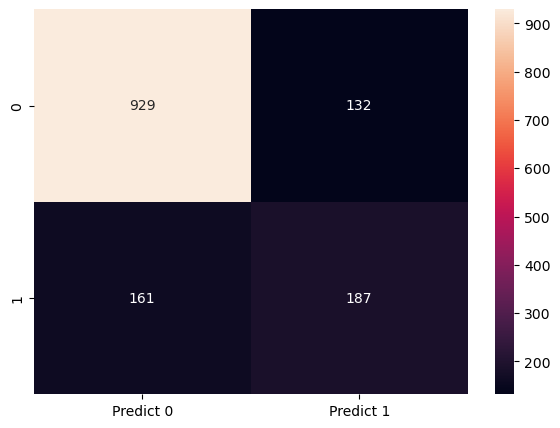

In [83]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict_test, labels=[0,1])

df_cm_test = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_test, annot=True,fmt='g')

**Classification Report for Training data**

In [84]:
print("Classification  Report for the Model on Training data:\n",metrics.classification_report(y_train,y_predict_train))

Classification  Report for the Model on Training data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4113
           1       1.00      0.99      1.00      1521

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



**Classification Report for Testing data**

In [85]:
print("Classification  Report for the Model:\n",metrics.classification_report(y_test,y_predict_test))

Classification  Report for the Model:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1061
           1       0.59      0.54      0.56       348

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.79      0.79      0.79      1409



**Accuracy**

In [86]:
rf_score_test=rf.score(X_test,y_test)
rf_score_train=rf.score(X_train,y_train)
print('Accuracy of the model on train data is: {0:0.2f}'.format(rf_score_train))
print('Accuracy of the model on test data is: {0:0.2f}'.format(rf_score_test))

Accuracy of the model on train data is: 1.00
Accuracy of the model on test data is: 0.79


**Precision**

In [87]:
rf_Prec_test = metrics.precision_score(y_test,y_predict_test)
rf_Prec_train = metrics.precision_score(y_train,y_predict_train)
print('The precision of the model on train data is : {0:0.2f}'.format(rf_Prec_train))
print('The precision of the model on test data is : {0:0.2f}'.format(rf_Prec_test))

The precision of the model on train data is : 1.00
The precision of the model on test data is : 0.59


**Recall**

In [88]:
rf_Recall_train = metrics.recall_score(y_train,y_predict_train)
rf_Recall_test = metrics.recall_score(y_test,y_predict_test)
print('The Sensitivity of the model on train data is : {0:0.2f}'.format(rf_Recall_train))
print('The Sensitivity of the model on test data is : {0:0.2f}'.format(rf_Recall_test))

The Sensitivity of the model on train data is : 0.99
The Sensitivity of the model on test data is : 0.54


**F1-Score**

In [89]:
rf_f1score_train = metrics.f1_score(y_train,y_predict_train)
rf_f1score_test = metrics.f1_score(y_test,y_predict_test)
print('The f1-score of the model on train data is : {0:0.2f}'.format(rf_f1score_train))
print('The f1-score of the model on test data is : {0:0.2f}'.format(rf_f1score_test))

The f1-score of the model on train data is : 1.00
The f1-score of the model on test data is : 0.56


In [90]:
X_train.shape

(5634, 26)

In [91]:
start=time.time()
#setting the Hyperparameters range
skf = StratifiedKFold(n_splits=5)

n_estimators = list(np.arange(10,151,10))
#criterion = ["gini", "entropy"]
max_depth = [4,6,8,10,12]
min_samples_split = [20,30,40,50]
min_samples_leaf = [1,5,10,20]
max_features = [4,5,6,8,10,12]
#bootstrap = [True,False]

#Initializing the hyperparameters dictionary
hyperparameters_rf = dict(#criterion=criterion,
                          n_estimators=n_estimators,
                           max_depth=max_depth,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf,
                           max_features=max_features
                           #bootstrap=bootstrap
                            )

rf_tuned = RandomForestClassifier(random_state=9)
rf_tuned_model = GridSearchCV(rf_tuned, 
                                 hyperparameters_rf, 
                                 refit = True, 
                                 verbose = 3, 
                                 n_jobs=-1, 
                                 cv=skf)
best_model_rf = rf_tuned_model.fit(X_train,y_train)
best_model_rf.best_score_
end=time.time()

print('time in minutes: ',(end-start)/60)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


0.8020899888258647

time in minutes:  81.04884664614995


In [92]:
best_model_rf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 9,
 'verbose': 0,
 'warm_start': False}

**Feature Importance**

                                    Feature  Feature_Importance
10                                 Contract                0.18
0                                    tenure                0.16
13                             TotalCharges                0.15
3                           InternetService                0.10
12                           MonthlyCharges                0.09
4                            OnlineSecurity                0.06
24           PaymentMethod_Electronic check                0.05
7                               TechSupport                0.03
8                               StreamingTV                0.03
5                              OnlineBackup                0.02
9                           StreamingMovies                0.02
6                          DeviceProtection                0.02
11                         PaperlessBilling                0.01
2                             MultipleLines                0.01
18                               Partner

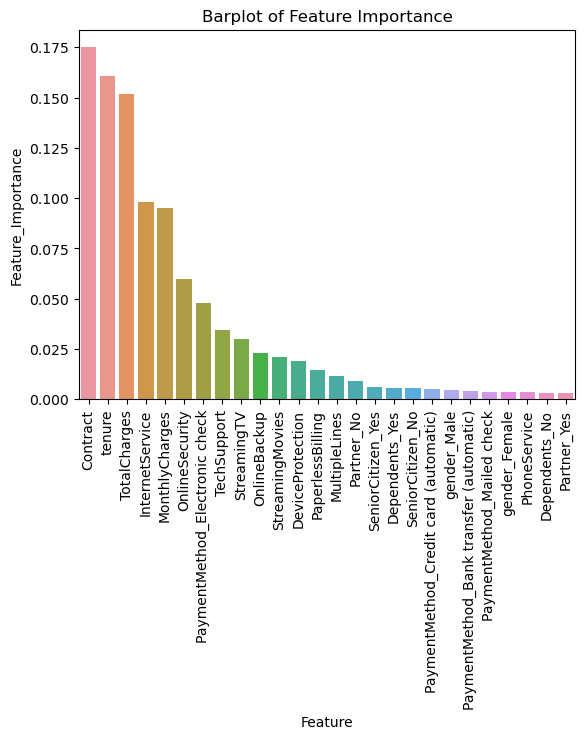

In [93]:
rf_tuned_FI=pd.DataFrame({'Feature':X_train.columns,'Feature_Importance':best_model_rf.best_estimator_.feature_importances_}).sort_values(by="Feature_Importance",ascending=False)
print (rf_tuned_FI)
sns.barplot(data=rf_tuned_FI,x='Feature',y='Feature_Importance');
plt.title('Barplot of Feature Importance');
plt.xticks(rotation=90);

**As per the Tuned Random Forest model the following features have significant impact on customer churn in the order as below**:
- Contract
- Tenure
- Total Charges
- Internet Service

In [94]:
tuned_rf_score_test=best_model_rf.score(X_test,y_test)
tuned_rf_score_train=best_model_rf.score(X_train,y_train)
print('Accuracy of the model on train data is: {0:0.2f}'.format(tuned_rf_score_train))
print('Accuracy of the model on test data is: {0:0.2f}'.format(tuned_rf_score_test))

Accuracy of the model on train data is: 0.82
Accuracy of the model on test data is: 0.82


In [95]:
y_pred_test_rf_tuned=best_model_rf.predict(X_test)
y_pred_train_rf_tuned=best_model_rf.predict(X_train)

**Confusion Matrix for Training Data:**

<Figure size 700x500 with 0 Axes>

<Axes: >

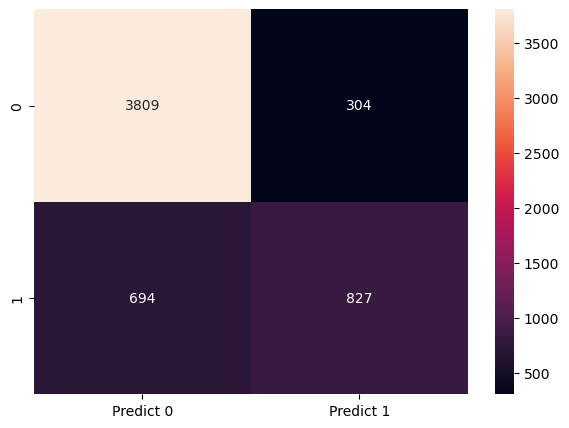

In [96]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_train, y_pred_train_rf_tuned, labels=[0,1])

df_cm_train = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_train, annot=True,fmt='g')

**Confusion Matrix for Testing Data:**

<Figure size 700x500 with 0 Axes>

<Axes: >

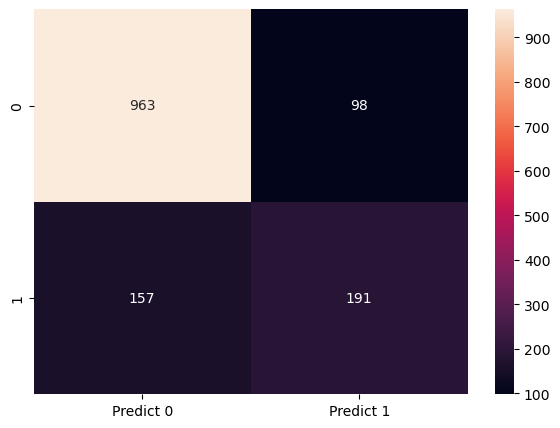

In [97]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred_test_rf_tuned, labels=[0,1])

df_cm_test = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_test, annot=True,fmt='g')

**Classification Report for Training data**

In [98]:
print("Classification  Report for the Model on Training data:\n",metrics.classification_report(y_train,y_pred_train_rf_tuned))

Classification  Report for the Model on Training data:
               precision    recall  f1-score   support

           0       0.85      0.93      0.88      4113
           1       0.73      0.54      0.62      1521

    accuracy                           0.82      5634
   macro avg       0.79      0.73      0.75      5634
weighted avg       0.81      0.82      0.81      5634



**Classification Report for Testing data**

In [99]:
print("Classification  Report for the Model:\n",metrics.classification_report(y_test,y_pred_test_rf_tuned))

Classification  Report for the Model:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1061
           1       0.66      0.55      0.60       348

    accuracy                           0.82      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409



**Accuracy**

In [100]:
rf_tuned_score_test=best_model_rf.score(X_test,y_test)
rf_tuned_score_train=best_model_rf.score(X_train,y_train)
print('Accuracy of the model on train data is: {0:0.2f}'.format(rf_tuned_score_train))
print('Accuracy of the model on test data is: {0:0.2f}'.format(rf_tuned_score_test))

Accuracy of the model on train data is: 0.82
Accuracy of the model on test data is: 0.82


**Precision**

In [101]:
rf_tuned_Prec_test = metrics.precision_score(y_test,y_pred_test_rf_tuned)
rf_tuned_Prec_train = metrics.precision_score(y_train,y_pred_train_rf_tuned)
print('The precision of the model on train data is : {0:0.2f}'.format(rf_tuned_Prec_train))
print('The precision of the model on test data is : {0:0.2f}'.format(rf_tuned_Prec_test))

The precision of the model on train data is : 0.73
The precision of the model on test data is : 0.66


**Recall**

In [102]:
rf_tuned_Recall_train = metrics.recall_score(y_train,y_pred_train_rf_tuned)
rf_tuned_Recall_test = metrics.recall_score(y_test,y_pred_test_rf_tuned)
print('The Sensitivity of the model on train data is : {0:0.2f}'.format(rf_tuned_Recall_train))
print('The Sensitivity of the model on test data is : {0:0.2f}'.format(rf_tuned_Recall_test))

The Sensitivity of the model on train data is : 0.54
The Sensitivity of the model on test data is : 0.55


**F1-Score**

In [103]:
rf_tuned_f1score_train = metrics.f1_score(y_train,y_pred_train_rf_tuned)
rf_tuned_f1score_test = metrics.f1_score(y_test,y_pred_test_rf_tuned)
print('The f1-score of the model on train data is : {0:0.2f}'.format(rf_tuned_f1score_train))
print('The f1-score of the model on test data is : {0:0.2f}'.format(rf_tuned_f1score_test))

The f1-score of the model on train data is : 0.62
The f1-score of the model on test data is : 0.60


**Improvement in Random Forest Model after hyperparameter tuning**

In [104]:
print('\033[1mImprovement in Random Forest model performance on test data after tuning is as below:\033[0m\n')

print('Improvement in Accuracy = {0:0.2f}%'.format((rf_tuned_score_test-rf_score_test)*100/rf_score_test))
print('\n******************************************\n')

print('Improvement in Precision is: {0:0.2f}'.format((rf_tuned_Prec_test-rf_Prec_test)*100/rf_Prec_test))
    
print('\n******************************************\n')

print('Improvement in Recall is: {0:0.2f}'.format((rf_tuned_Recall_test-rf_Recall_test)*100/rf_Recall_test))

print('\n******************************************\n')

print('Improvement in F1-Score is: {0:0.2f}'.format((rf_tuned_f1score_test-rf_f1score_test)*100/rf_f1score_test))

Improvement in Random Forest model performance on test data after tuning is as below:

Improvement in Accuracy = 3.41%

******************************************

Improvement in Precision is: 12.74

******************************************

Improvement in Recall is: 2.14

******************************************

Improvement in F1-Score is: 6.95


In [105]:
from sklearn.ensemble import AdaBoostClassifier

#Training a Random Forest model with default values
ab = AdaBoostClassifier(random_state=9)
ab.fit(X_train, y_train)

y_predict_test=ab.predict(X_test)
y_predict_train=ab.predict(X_train)

AdaBoostClassifier(random_state=9)

In [106]:
ab.get_params(deep=True)

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 9}

**Feature Importance**

                                    Feature  Feature_Importance
13                             TotalCharges                0.28
12                           MonthlyCharges                0.20
0                                    tenure                0.20
10                                 Contract                0.12
3                           InternetService                0.02
24           PaymentMethod_Electronic check                0.02
16                         SeniorCitizen_No                0.02
4                            OnlineSecurity                0.02
2                             MultipleLines                0.02
11                         PaperlessBilling                0.02
25               PaymentMethod_Mailed check                0.02
9                           StreamingMovies                0.02
8                               StreamingTV                0.02
5                              OnlineBackup                0.02
1                              PhoneServ

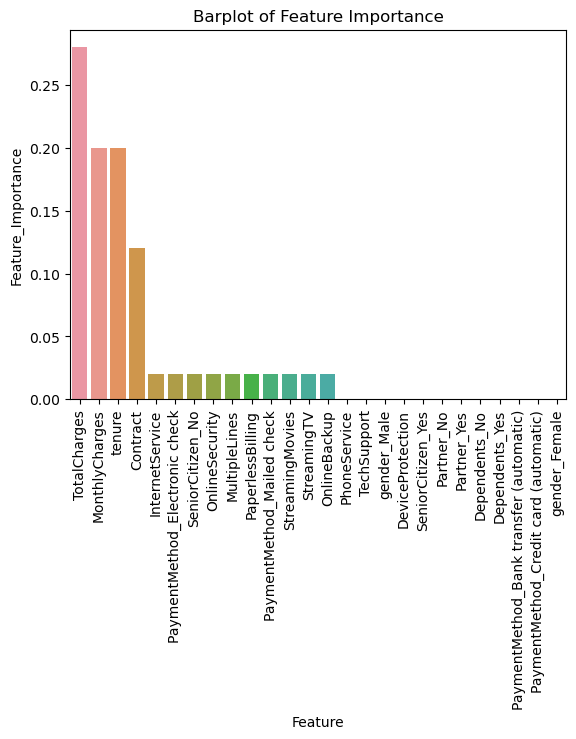

In [107]:
ab_FI=pd.DataFrame({'Feature':X_train.columns,'Feature_Importance':ab.feature_importances_}).sort_values(by="Feature_Importance",ascending=False)
print (ab_FI)
sns.barplot(data=ab_FI,x='Feature',y='Feature_Importance');
plt.title('Barplot of Feature Importance');
plt.xticks(rotation=90);

**As per the AdaBoost model the following features have significant impact on customer churn in the order as below**:
- Total Charges
- Monthly Charges
- Tenure
- Contract

In [108]:
print('The score of the model on training data is: {0:0.2f}'.format(ab.score(X_train, y_train)));
print('The score of the model on test data is: {0:0.2f}'.format(ab.score(X_test, y_test)));

The score of the model on training data is: 0.81
The score of the model on test data is: 0.81


**Confusion Matrix for Training Data:**

<Figure size 700x500 with 0 Axes>

<Axes: >

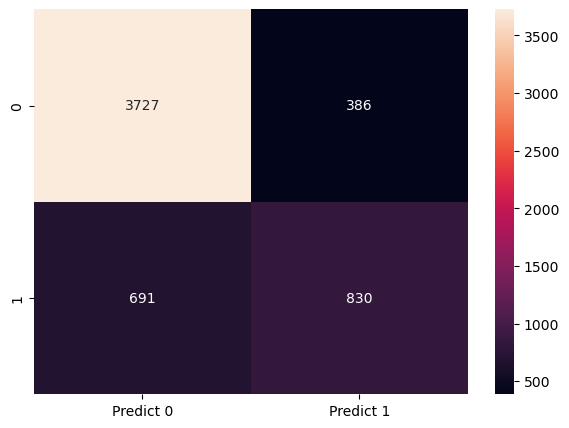

In [109]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_train, y_predict_train, labels=[0,1])

df_cm_train = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_train, annot=True,fmt='g')

**Confusion Matrix for Testing Data:**

<Figure size 700x500 with 0 Axes>

<Axes: >

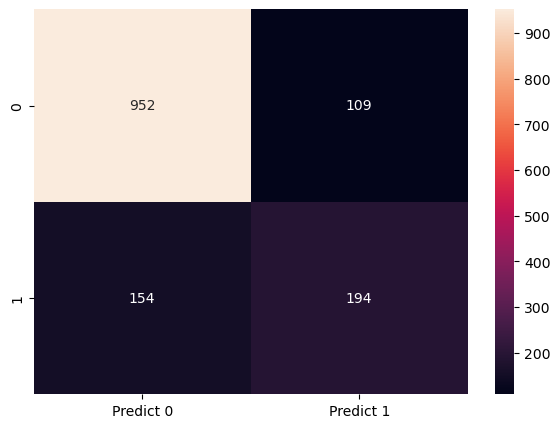

In [110]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict_test, labels=[0,1])

df_cm_test = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_test, annot=True,fmt='g')

**Classification Report for Training data**

In [111]:
print("Classification  Report for the Model on Training data:\n",metrics.classification_report(y_train,y_predict_train))

Classification  Report for the Model on Training data:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      4113
           1       0.68      0.55      0.61      1521

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634



**Classification Report for Testing data**

In [112]:
print("Classification  Report for the Model:\n",metrics.classification_report(y_test,y_predict_test))

Classification  Report for the Model:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1061
           1       0.64      0.56      0.60       348

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



**Accuracy**

In [113]:
ab_score_test=ab.score(X_test,y_test)
ab_score_train=ab.score(X_train,y_train)
print('Accuracy of the model on train data is: {0:0.2f}'.format(ab_score_train))
print('Accuracy of the model on test data is: {0:0.2f}'.format(ab_score_test))

Accuracy of the model on train data is: 0.81
Accuracy of the model on test data is: 0.81


**Precision**

In [114]:
ab_Prec_test = metrics.precision_score(y_test,y_predict_test)
ab_Prec_train = metrics.precision_score(y_train,y_predict_train)
print('The precision of the model on train data is : {0:0.2f}'.format(ab_Prec_train))
print('The precision of the model on test data is : {0:0.2f}'.format(ab_Prec_test))

The precision of the model on train data is : 0.68
The precision of the model on test data is : 0.64


**Recall**

In [115]:
ab_Recall_train = metrics.recall_score(y_train,y_predict_train)
ab_Recall_test = metrics.recall_score(y_test,y_predict_test)
print('The Sensitivity of the model on train data is : {0:0.2f}'.format(ab_Recall_train))
print('The Sensitivity of the model on test data is : {0:0.2f}'.format(ab_Recall_test))

The Sensitivity of the model on train data is : 0.55
The Sensitivity of the model on test data is : 0.56


**F1-Score**

In [116]:
ab_f1score_train = metrics.f1_score(y_train,y_predict_train)
ab_f1score_test = metrics.f1_score(y_test,y_predict_test)
print('The f1-score of the model on train data is : {0:0.2f}'.format(ab_f1score_train))
print('The f1-score of the model on test data is : {0:0.2f}'.format(ab_f1score_test))

The f1-score of the model on train data is : 0.61
The f1-score of the model on test data is : 0.60


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm

start=time.time()
#setting the Hyperparameters range
skf = StratifiedKFold(n_splits=15)


estimator=[DecisionTreeClassifier(random_state=9),LogisticRegression(random_state=9,solver='liblinear')]
n_estimators = list(np.arange(40,501,20))
#learning_rate = [0.1,0.5,1.0,1.2,1.5]
learning_rate = [0.01,0.02,0.03,0.04,0.05,0.08,0.1,0.5,1.0]
#algorithm = ['SAMME', 'SAMME.R']

#Initializing the hyperparameters dictionary
hyperparameters_ab = dict(n_estimators=n_estimators,
                          learning_rate=learning_rate,
                          #algorithm=algorithm
                          estimator=estimator
                            )

ab_tuned = AdaBoostClassifier(random_state=9)
ab_tuned_model = GridSearchCV(ab_tuned, 
                                 hyperparameters_ab, 
                                 refit = True, 
                                 verbose = 3, 
                                 n_jobs=-1,
                                 #scoring='recall',
                                 cv=skf)


best_model_ab = ab_tuned_model.fit(X_train,y_train)

best_model_ab.best_score_
end=time.time()

print('time in minutes: ',(end-start)/60)

Fitting 15 folds for each of 432 candidates, totalling 6480 fits


0.802806146572104

time in minutes:  221.9737226764361


In [118]:
best_model_ab.best_estimator_.get_params(deep=True)

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': 9,
 'estimator__solver': 'liblinear',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(random_state=9, solver='liblinear'),
 'learning_rate': 0.5,
 'n_estimators': 480,
 'random_state': 9}

**Feature Importance cannot be derived for the tuned Adaboost model as it uses Logistic Regressor as the best estimator. Feature Importance works for tree based models. Also the Logistic Regression coefficients cannot be derived as the '.coef_' methos doesnt work with models tuned using GridSearchCV**

In [120]:
tuned_ab_score_test=best_model_ab.score(X_test,y_test)
tuned_ab_score_train=best_model_ab.score(X_train,y_train)
print('Accuracy of the model on train data is: {0:0.2f}'.format(tuned_ab_score_train))
print('Accuracy of the model on test data is: {0:0.2f}'.format(tuned_ab_score_test))

Accuracy of the model on train data is: 0.80
Accuracy of the model on test data is: 0.81


In [121]:
y_pred_test_ab_tuned=best_model_ab.predict(X_test)
y_pred_train_ab_tuned=best_model_ab.predict(X_train)

**Confusion Matrix for Training Data:**

<Figure size 700x500 with 0 Axes>

<Axes: >

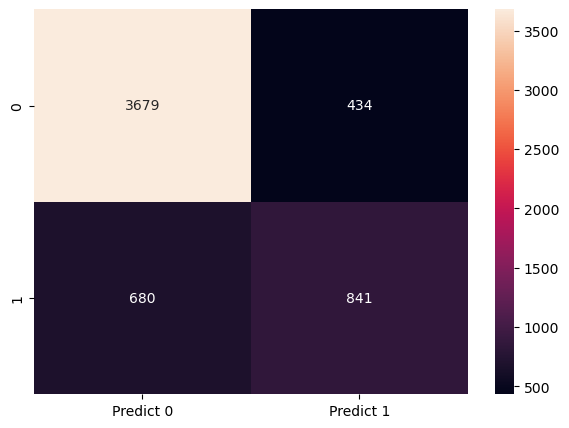

In [122]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_train, y_pred_train_ab_tuned, labels=[0,1])

df_cm_train = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_train, annot=True,fmt='g')

**Confusion Matrix for Testing Data:**

<Figure size 700x500 with 0 Axes>

<Axes: >

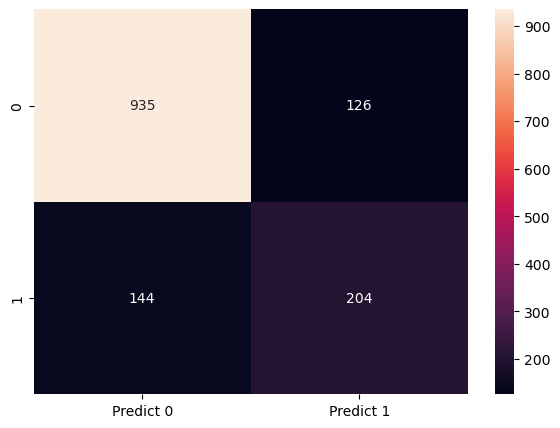

In [123]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred_test_ab_tuned, labels=[0,1])

df_cm_test = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_test, annot=True,fmt='g')

**Classification Report for Training data**

In [124]:
print("Classification  Report for the Model on Training data:\n",metrics.classification_report(y_train,y_pred_train_ab_tuned))

Classification  Report for the Model on Training data:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      4113
           1       0.66      0.55      0.60      1521

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.74      5634
weighted avg       0.79      0.80      0.80      5634



**Classification Report for Testing data**

In [125]:
print("Classification  Report for the Model:\n",metrics.classification_report(y_test,y_pred_test_ab_tuned))

Classification  Report for the Model:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      1061
           1       0.62      0.59      0.60       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



**Accuracy**

In [126]:
ab_tuned_score_test=best_model_ab.score(X_test,y_test)
ab_tuned_score_train=best_model_ab.score(X_train,y_train)
print('Accuracy of the model on train data is: {0:0.2f}'.format(ab_tuned_score_train))
print('Accuracy of the model on test data is: {0:0.2f}'.format(ab_tuned_score_test))

Accuracy of the model on train data is: 0.80
Accuracy of the model on test data is: 0.81


**Precision**

In [127]:
ab_tuned_Prec_test = metrics.precision_score(y_test,y_pred_test_ab_tuned)
ab_tuned_Prec_train = metrics.precision_score(y_train,y_pred_train_ab_tuned)
print('The precision of the model on train data is : {0:0.2f}'.format(ab_tuned_Prec_train))
print('The precision of the model on test data is : {0:0.2f}'.format(ab_tuned_Prec_test))

The precision of the model on train data is : 0.66
The precision of the model on test data is : 0.62


**Recall**

In [128]:
ab_tuned_Recall_train = metrics.recall_score(y_train,y_pred_train_ab_tuned)
ab_tuned_Recall_test = metrics.recall_score(y_test,y_pred_test_ab_tuned)
print('The Sensitivity of the model on train data is : {0:0.2f}'.format(ab_tuned_Recall_train))
print('The Sensitivity of the model on test data is : {0:0.2f}'.format(ab_tuned_Recall_test))

The Sensitivity of the model on train data is : 0.55
The Sensitivity of the model on test data is : 0.59


**F1-Score**

In [129]:
ab_tuned_f1score_train = metrics.f1_score(y_train,y_pred_train_ab_tuned)
ab_tuned_f1score_test = metrics.f1_score(y_test,y_pred_test_ab_tuned)
print('The f1-score of the model on train data is : {0:0.2f}'.format(ab_tuned_f1score_train))
print('The f1-score of the model on test data is : {0:0.2f}'.format(ab_tuned_f1score_test))

The f1-score of the model on train data is : 0.60
The f1-score of the model on test data is : 0.60


**Improvement in AdaBoost Model after hyperparameter tuning**

In [130]:
print('\033[1mImprovement in Adaboost model performance on test data after tuning is as below:\033[0m\n')

print('Improvement in Accuracy = {0:0.2f}%'.format((ab_tuned_score_test-ab_score_test)*100/ab_score_test))
print('\n******************************************\n')

print('Improvement in Precision is: {0:0.2f}'.format((ab_tuned_Prec_test-ab_Prec_test)*100/ab_Prec_test))
    
print('\n******************************************\n')

print('Improvement in Recall is: {0:0.2f}'.format((ab_tuned_Recall_test-ab_Recall_test)*100/ab_Recall_test))

print('\n******************************************\n')

print('Improvement in F1-Score is: {0:0.2f}'.format((ab_tuned_f1score_test-ab_f1score_test)*100/ab_f1score_test))

Improvement in Adaboost model performance on test data after tuning is as below:

Improvement in Accuracy = -0.61%

******************************************

Improvement in Precision is: -3.45

******************************************

Improvement in Recall is: 5.15

******************************************

Improvement in F1-Score is: 0.97


In [131]:
from sklearn.ensemble import GradientBoostingClassifier

#Training a Random Forest model with default values
gb = GradientBoostingClassifier(random_state=9)
gb.fit(X_train, y_train)

y_predict_test=gb.predict(X_test)
y_predict_train=gb.predict(X_train)

GradientBoostingClassifier(random_state=9)

In [132]:
gb.get_params(deep=True)

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 9,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

**Feature Importance**

                                    Feature  Feature_Importance
10                                 Contract                0.43
0                                    tenure                0.14
3                           InternetService                0.12
13                             TotalCharges                0.10
12                           MonthlyCharges                0.07
24           PaymentMethod_Electronic check                0.04
4                            OnlineSecurity                0.01
9                           StreamingMovies                0.01
5                              OnlineBackup                0.01
11                         PaperlessBilling                0.01
7                               TechSupport                0.01
2                             MultipleLines                0.01
8                               StreamingTV                0.00
1                              PhoneService                0.00
17                        SeniorCitizen_

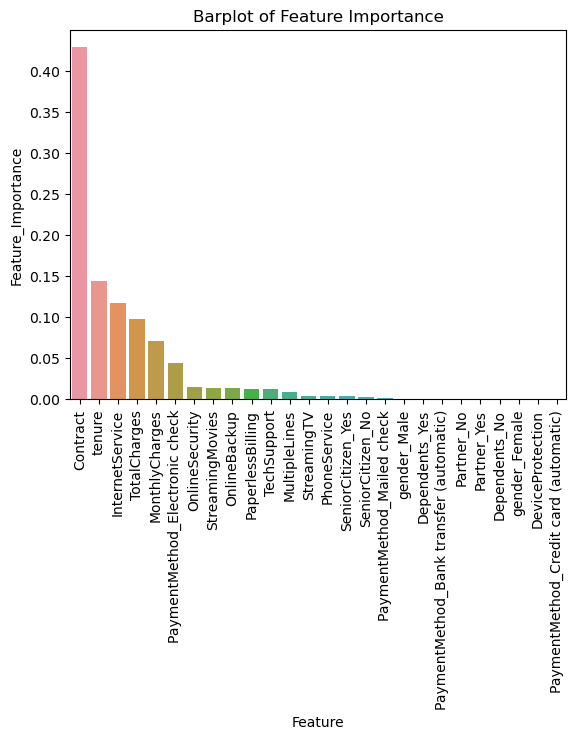

In [133]:
gb_FI=pd.DataFrame({'Feature':X_train.columns,'Feature_Importance':gb.feature_importances_}).sort_values(by="Feature_Importance",ascending=False)
print (gb_FI)
sns.barplot(data=gb_FI,x='Feature',y='Feature_Importance');
plt.title('Barplot of Feature Importance');
plt.xticks(rotation=90);

**As per the Gradient Boost model the following features have significant impact on customer churn in the order as below**:
- Contract
- Tenure
- Internet Service
- Total Charges

In [134]:
print('The score of the model on training data is: {0:0.2f}'.format(gb.score(X_train, y_train)));
print('The score of the model on test data is: {0:0.2f}'.format(gb.score(X_test, y_test)));

The score of the model on training data is: 0.82
The score of the model on test data is: 0.81


**Confusion Matrix for Training Data:**

<Figure size 700x500 with 0 Axes>

<Axes: >

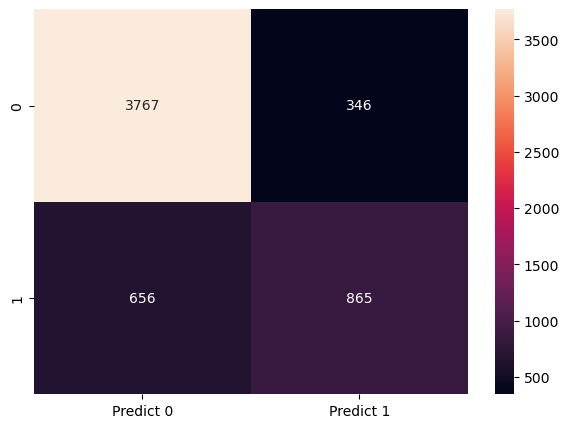

In [135]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_train, y_predict_train, labels=[0,1])

df_cm_train = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_train, annot=True,fmt='g')

**Confusion Matrix for Testing Data:**

<Figure size 700x500 with 0 Axes>

<Axes: >

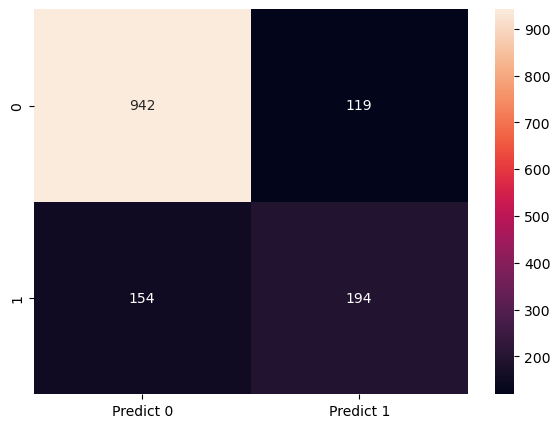

In [136]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict_test, labels=[0,1])

df_cm_test = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_test, annot=True,fmt='g')

**Classification Report for Training data**

In [137]:
print("Classification  Report for the Model on Training data:\n",metrics.classification_report(y_train,y_predict_train))

Classification  Report for the Model on Training data:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      4113
           1       0.71      0.57      0.63      1521

    accuracy                           0.82      5634
   macro avg       0.78      0.74      0.76      5634
weighted avg       0.81      0.82      0.82      5634



**Classification Report for Testing data**

In [138]:
print("Classification  Report for the Model:\n",metrics.classification_report(y_test,y_predict_test))

Classification  Report for the Model:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1061
           1       0.62      0.56      0.59       348

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



**Accuracy**

In [139]:
gb_score_test=gb.score(X_test,y_test)
gb_score_train=gb.score(X_train,y_train)
print('Accuracy of the model on train data is: {0:0.2f}'.format(gb_score_train))
print('Accuracy of the model on test data is: {0:0.2f}'.format(gb_score_test))

Accuracy of the model on train data is: 0.82
Accuracy of the model on test data is: 0.81


**Precision**

In [140]:
gb_Prec_test = metrics.precision_score(y_test,y_predict_test)
gb_Prec_train = metrics.precision_score(y_train,y_predict_train)
print('The precision of the model on train data is : {0:0.2f}'.format(gb_Prec_train))
print('The precision of the model on test data is : {0:0.2f}'.format(gb_Prec_test))

The precision of the model on train data is : 0.71
The precision of the model on test data is : 0.62


**Recall**

In [141]:
gb_Recall_train = metrics.recall_score(y_train,y_predict_train)
gb_Recall_test = metrics.recall_score(y_test,y_predict_test)
print('The Sensitivity of the model on train data is : {0:0.2f}'.format(gb_Recall_train))
print('The Sensitivity of the model on test data is : {0:0.2f}'.format(gb_Recall_test))

The Sensitivity of the model on train data is : 0.57
The Sensitivity of the model on test data is : 0.56


**F1-Score**

In [142]:
gb_f1score_train = metrics.f1_score(y_train,y_predict_train)
gb_f1score_test = metrics.f1_score(y_test,y_predict_test)
print('The f1-score of the model on train data is : {0:0.2f}'.format(gb_f1score_train))
print('The f1-score of the model on test data is : {0:0.2f}'.format(gb_f1score_test))

The f1-score of the model on train data is : 0.63
The f1-score of the model on test data is : 0.59


In [143]:
start=time.time()
#setting the Hyperparameters range
skf = StratifiedKFold(n_splits=5)

n_estimators = list(np.arange(40,201,20))
#learning_rate = [0.1,0.5,0.9,1.0]
#subsample =[0.1,0.5,1.0]
min_samples_split = [10,20,30,40,50]
min_samples_leaf = [1,10,20,30]
max_depth = [3,4,6,8]
max_features = [4,5,6,8,10]

#Initializing the hyperparameters dictionary
hyperparameters_gb = dict(n_estimators=n_estimators,
                          #learning_rate=learning_rate,
                          #subsample=subsample,
                          min_samples_split=min_samples_split,
                          min_samples_leaf=min_samples_leaf,
                          max_depth=max_depth,
                          max_features=max_features
                            )

gb_tuned = GradientBoostingClassifier(random_state=9)
gb_tuned_model = GridSearchCV(gb_tuned, 
                                 hyperparameters_gb, 
                                 refit = True, 
                                 verbose = 3, 
                                 n_jobs=-1,
                                 #scoring='accuracy',
                                 cv=skf)
best_model_gb = gb_tuned_model.fit(X_train,y_train)
best_model_gb.best_score_
end=time.time()

print('time in minutes: ',(end-start)/60)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


0.8052854132617601

time in minutes:  63.19519714514414


In [144]:
best_model_gb.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 4,
 'max_features': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_iter_no_change': None,
 'random_state': 9,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

**Feature Importance**

                                    Feature  Feature_Importance
10                                 Contract                0.17
0                                    tenure                0.16
13                             TotalCharges                0.15
3                           InternetService                0.12
24           PaymentMethod_Electronic check                0.10
12                           MonthlyCharges                0.08
4                            OnlineSecurity                0.05
7                               TechSupport                0.03
9                           StreamingMovies                0.03
5                              OnlineBackup                0.02
6                          DeviceProtection                0.02
11                         PaperlessBilling                0.01
2                             MultipleLines                0.01
8                               StreamingTV                0.01
20                            Dependents

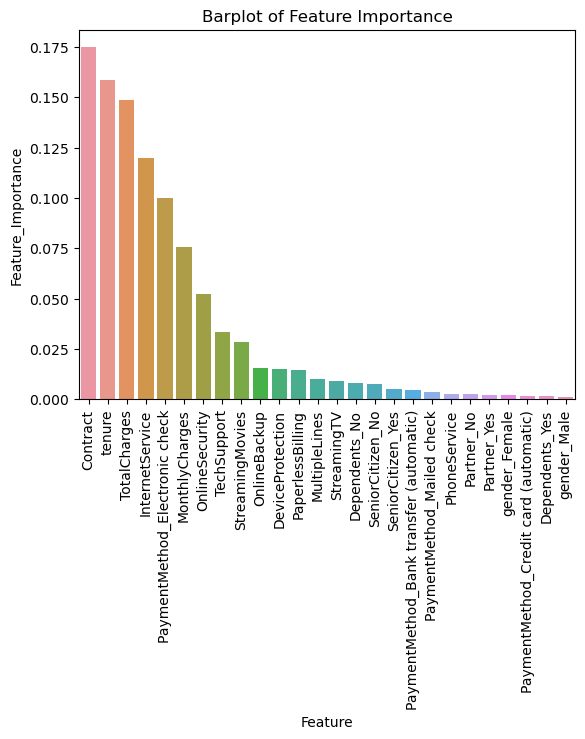

In [145]:
gb_tuned_FI=pd.DataFrame({'Feature':X_train.columns,'Feature_Importance':best_model_gb.best_estimator_.feature_importances_}).sort_values(by="Feature_Importance",ascending=False)
print (gb_tuned_FI)
sns.barplot(data=gb_tuned_FI,x='Feature',y='Feature_Importance');
plt.title('Barplot of Feature Importance');
plt.xticks(rotation=90);

**As per the Tuned Gradient Boost model the following features have significant impact on customer churn in the order as below**:
- Contract
- Tenure
- Total Charges
- Internet Service

In [146]:
tuned_gb_score_test=best_model_gb.score(X_test,y_test)
tuned_gb_score_train=best_model_gb.score(X_train,y_train)
print('Accuracy of the model on train data is: {0:0.2f}'.format(tuned_gb_score_train))
print('Accuracy of the model on test data is: {0:0.2f}'.format(tuned_gb_score_test))

Accuracy of the model on train data is: 0.82
Accuracy of the model on test data is: 0.81


In [147]:
y_pred_test_gb_tuned=best_model_gb.predict(X_test)
y_pred_train_gb_tuned=best_model_gb.predict(X_train)

**Confusion Matrix for Training Data:**

<Figure size 700x500 with 0 Axes>

<Axes: >

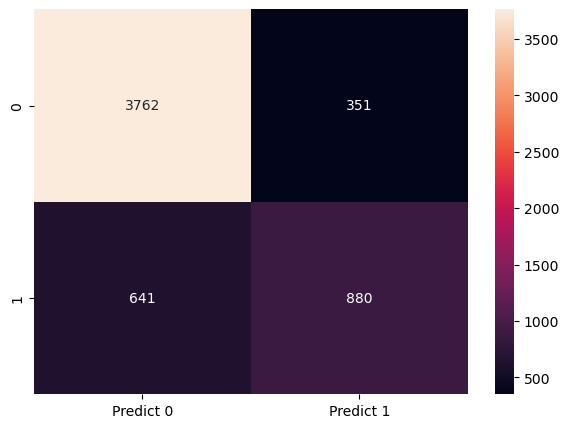

In [148]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_train, y_pred_train_gb_tuned, labels=[0,1])

df_cm_train = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_train, annot=True,fmt='g')

**Confusion Matrix for Testing Data:**

<Figure size 700x500 with 0 Axes>

<Axes: >

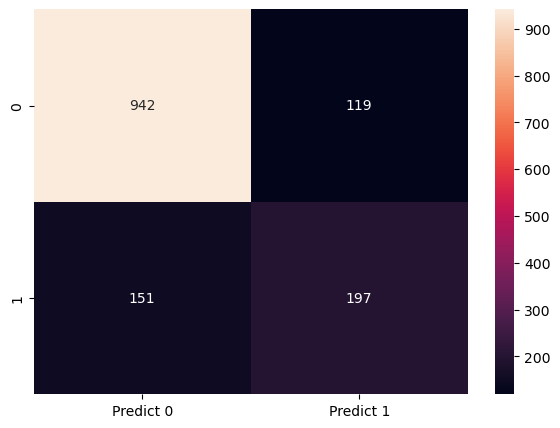

In [149]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred_test_gb_tuned, labels=[0,1])

df_cm_test = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_test, annot=True,fmt='g')

**Classification Report for Training data**

In [150]:
print("Classification  Report for the Model on Training data:\n",metrics.classification_report(y_train,y_pred_train_gb_tuned))

Classification  Report for the Model on Training data:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      4113
           1       0.71      0.58      0.64      1521

    accuracy                           0.82      5634
   macro avg       0.78      0.75      0.76      5634
weighted avg       0.82      0.82      0.82      5634



**Classification Report for Testing data**

In [151]:
print("Classification  Report for the Model:\n",metrics.classification_report(y_test,y_pred_test_gb_tuned))

Classification  Report for the Model:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1061
           1       0.62      0.57      0.59       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.81      0.81      1409



**Accuracy**

In [152]:
gb_tuned_score_test=best_model_gb.score(X_test,y_test)
gb_tuned_score_train=best_model_gb.score(X_train,y_train)
print('Accuracy of the model on train data is: {0:0.2f}'.format(gb_tuned_score_train))
print('Accuracy of the model on test data is: {0:0.2f}'.format(gb_tuned_score_test))

Accuracy of the model on train data is: 0.82
Accuracy of the model on test data is: 0.81


**Precision**

In [153]:
gb_tuned_Prec_test = metrics.precision_score(y_test,y_pred_test_gb_tuned)
gb_tuned_Prec_train = metrics.precision_score(y_train,y_pred_train_gb_tuned)
print('The precision of the model on train data is : {0:0.2f}'.format(gb_tuned_Prec_train))
print('The precision of the model on test data is : {0:0.2f}'.format(gb_tuned_Prec_test))

The precision of the model on train data is : 0.71
The precision of the model on test data is : 0.62


**Recall**

In [154]:
gb_tuned_Recall_train = metrics.recall_score(y_train,y_pred_train_gb_tuned)
gb_tuned_Recall_test = metrics.recall_score(y_test,y_pred_test_gb_tuned)
print('The Sensitivity of the model on train data is : {0:0.2f}'.format(gb_tuned_Recall_train))
print('The Sensitivity of the model on test data is : {0:0.2f}'.format(gb_tuned_Recall_test))

The Sensitivity of the model on train data is : 0.58
The Sensitivity of the model on test data is : 0.57


**F1-Score**

In [155]:
gb_tuned_f1score_train = metrics.f1_score(y_train,y_pred_train_gb_tuned)
gb_tuned_f1score_test = metrics.f1_score(y_test,y_pred_test_gb_tuned)
print('The f1-score of the model on train data is : {0:0.2f}'.format(gb_tuned_f1score_train))
print('The f1-score of the model on test data is : {0:0.2f}'.format(gb_tuned_f1score_test))

The f1-score of the model on train data is : 0.64
The f1-score of the model on test data is : 0.59


**Improvement in GradientBoost Model after hyperparameter tuning**

In [156]:
print('\033[1mImprovement in Gradientboost model performance on test data after tuning is as below:\033[0m\n')

print('Improvement in Accuracy = {0:0.2f}%'.format((gb_tuned_score_test-gb_score_test)*100/gb_score_test))
print('\n******************************************\n')

print('Improvement in Precision is: {0:0.2f}'.format((gb_tuned_Prec_test-gb_Prec_test)*100/gb_Prec_test))
    
print('\n******************************************\n')

print('Improvement in Recall is: {0:0.2f}'.format((gb_tuned_Recall_test-gb_Recall_test)*100/gb_Recall_test))

print('\n******************************************\n')

print('Improvement in F1-Score is: {0:0.2f}'.format((gb_tuned_f1score_test-gb_f1score_test)*100/gb_f1score_test))

Improvement in Gradientboost model performance on test data after tuning is as below:

Improvement in Accuracy = 0.26%

******************************************

Improvement in Precision is: 0.58

******************************************

Improvement in Recall is: 1.55

******************************************

Improvement in F1-Score is: 1.09


#### 1. Decision Tree

In [157]:
columns = ['Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
perf_df_dt = pd.DataFrame(columns=columns)

for model in ['train','test']:
    perf_df_dt = perf_df_dt.append({'Dataset': model, 'Accuracy': globals()['dTree_score_'+model], 'Precision': globals()['dTree_Prec_'+model], 
                              'Recall': globals()['dTree_Recall_'+model], 'F1 Score': globals()['dTree_f1score_'+model]}, ignore_index=True)
print('Performance of the Decision Tree model on Train and Test data is as below:\n\n',perf_df_dt)

Performance of the Decision Tree model on Train and Test data is as below:

   Dataset  Accuracy  Precision  Recall  F1 Score
0   train      1.00       1.00    0.99      1.00
1    test      0.73       0.47    0.56      0.51


**Performance of Decision Tree on Train data**
- Accuracy, Precision and F1-Score are 100%
- Recall is 99%

**Performance of Decision Tree on Test data**
- Accuracy is 73%
- Precision is 47%
- Recall is 56%
- F1-Score is 51%

**Summary**
- Since the performance parameters on train data are 100% or close to it, but model performance is low on Test data, the model is an overfitting model
- It can predict on the train data wth high accuracy, but doesnt predict very well with test data
- Because of the overfitting nature of this model, it cannot be termed as a good model

#### 2. GridSearchCV based Decision Tree 

In [158]:
columns = ['Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
perf_df_dtt = pd.DataFrame(columns=columns)

for model in ['train','test']:
    perf_df_dtt = perf_df_dtt.append({'Dataset': model, 'Accuracy': globals()['dTree_tuned_score_'+model], 'Precision': globals()['dTree_tuned_Prec_'+model], 
                              'Recall': globals()['dTree_tuned_Recall_'+model], 'F1 Score': globals()['dTree_tuned_f1score_'+model]}, ignore_index=True)
print('Performance of the GridSearchCV based Decision Tree model on Train and Test data is as below:\n\n',perf_df_dtt)

Performance of the GridSearchCV based Decision Tree model on Train and Test data is as below:

   Dataset  Accuracy  Precision  Recall  F1 Score
0   train      0.81       0.67    0.56      0.61
1    test      0.80       0.60    0.57      0.58


**Performance of GridSearchCV based Decision Tree on Train data**
- Accuracy has gone down from 100% to 81% when compared to default Decision Tree model.
- Precision gone down from 100% to 67% when compared to default Decision Tree model.
- Recall gone down from 99% to 56% when compared to default Decision Tree model.
- F1-Score gone down from 100% to 61% when compared to default Decision Tree model.

**Performance of GridSearchCV based Decision Tree on Test data**
- Accuracy of model has improved from 73% to 80% when compared to default Decision Tree model.
- Precision of model has improved from 47% to 60% when compared to default Decision Tree model.
- Recall of model has improved slightly from 56% to 57% when compared to default Decision Tree model.
- F1-Score of model has improved from 51% to 58% when compared to default Decision Tree model.

**Summary**
- Since the performance parameters on train data and Test data are similar, the model is NOT an overfitting/underfitting model and can be termed as a appropriate fitting model
- Recall and Precision of the model are not high for both train and test data
- False negatives of the model are high, which may result in the model predicting that a customer will not churn, but in reality he will
- Overall the accuracy of the model is high on both train and test data

#### 3. Random Forest

In [159]:
columns = ['Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
perf_df_rf = pd.DataFrame(columns=columns)

for model in ['train','test']:
    perf_df_rf = perf_df_rf.append({'Dataset': model, 'Accuracy': globals()['rf_score_'+model], 'Precision': globals()['rf_Prec_'+model], 
                              'Recall': globals()['rf_Recall_'+model], 'F1 Score': globals()['rf_f1score_'+model]}, ignore_index=True)
print('Performance of the Random Forest model on Train and Test data is as below:\n\n',perf_df_rf)

Performance of the Random Forest model on Train and Test data is as below:

   Dataset  Accuracy  Precision  Recall  F1 Score
0   train      1.00       1.00    0.99      1.00
1    test      0.79       0.59    0.54      0.56


**Performance of Random Forest on Train data**
- Accuracy, Precision and F1-Score are 100%
- Recall is 99%

**Performance of Random Forest on Test data**
- Accuracy is 79%
- Precision is 59%
- Recall is 54%
- F1-Score is 56%

**Summary**
- Since the performance parameters on train data are 100% or close to it, but model performance is low on Test data, the model is an overfitting model
- It can predict on the train data wth high accuracy, but doesnt predict very well with test data
- Because of the overfitting nature of this model, it cannot be termed as a good model

#### 4. GridSearchCV based Random Forest

In [160]:
columns = ['Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
perf_df_rft = pd.DataFrame(columns=columns)

for model in ['train','test']:
    perf_df_rft = perf_df_rft.append({'Dataset': model, 'Accuracy': globals()['rf_tuned_score_'+model], 'Precision': globals()['rf_tuned_Prec_'+model], 
                              'Recall': globals()['rf_tuned_Recall_'+model], 'F1 Score': globals()['rf_tuned_f1score_'+model]}, ignore_index=True)
print('Performance of the GridSearchCV based Random Forest model on Train and Test data is as below:\n\n',perf_df_rft)

Performance of the GridSearchCV based Random Forest model on Train and Test data is as below:

   Dataset  Accuracy  Precision  Recall  F1 Score
0   train      0.82       0.73    0.54      0.62
1    test      0.82       0.66    0.55      0.60


**Performance of GridSearchCV based Random Forest on Train data**
- Accuracy has gone down from 100% to 82% when compared to default Random Forest model.
- Precision gone down from 100% to 73% when compared to default Random Forest model.
- Recall gone down from 99% to 54% when compared to default Random Forest model.
- F1-Score gone down from 100% to 62% when compared to default Random Forest model.

**Performance of GridSearchCV based Random Forest on Test data**
- Accuracy of model has improved from 79% to 82% when compared to default Random Forest model
- Precision of model has improved from 59% to 66% when compared to default Random Forest model
- Recall of model has improved slightly from 54% to 55% when compared to default Random Forest model
- F1-Score of model has improved from 56% to 60% when compared to default Random Forest model

**Summary**
- Since the performance parameters on train data and Test data are similar, the model is NOT overfitting/underfitting model and can be termed as a appropriate fitting model
- Recall and Precision of the model are not high for both train and test data
- False negatives of the model are high, which may result in the model predicting that a customer will not churn, but in reality he will
- Overall the accuracy of the model is high on both train and test data

#### 5. Adaboost

In [161]:
columns = ['Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
perf_df_ab = pd.DataFrame(columns=columns)

for model in ['train','test']:
    perf_df_ab = perf_df_ab.append({'Dataset': model, 'Accuracy': globals()['ab_score_'+model], 'Precision': globals()['ab_Prec_'+model], 
                              'Recall': globals()['ab_Recall_'+model], 'F1 Score': globals()['ab_f1score_'+model]}, ignore_index=True)
print('Performance of the Adaboost model on Train and Test data is as below:\n\n',perf_df_ab)

Performance of the Adaboost model on Train and Test data is as below:

   Dataset  Accuracy  Precision  Recall  F1 Score
0   train      0.81       0.68    0.55      0.61
1    test      0.81       0.64    0.56      0.60


**Performance of Adaboost on Train data**
- Accuracy is 81%
- Precision is 68%
- Recall is 55%
- F1-Score is 61%

**Performance of Adaboost on Test data**
- Accuracy is 81%
- Precision is 64%
- Recall is 56%
- F1-Score is 60%

**Summary**
- Since the performance parameters on train data and Test data are similar, the model is NOT overfitting/underfitting model and can be termed as a appropriate fitting model
- Recall and Precision of the model are not high for both train and test data
- False negatives of the model are high, which may result in the model predicting that a customer will not churn, but in reality he will
- Overall the accuracy of the model is high on both train and test data

#### 6. GridSearchCV based Adaboost

In [162]:
columns = ['Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
perf_df_abt = pd.DataFrame(columns=columns)

for model in ['train','test']:
    perf_df_abt = perf_df_abt.append({'Dataset': model, 'Accuracy': globals()['ab_tuned_score_'+model], 'Precision': globals()['ab_tuned_Prec_'+model], 
                              'Recall': globals()['ab_tuned_Recall_'+model], 'F1 Score': globals()['ab_tuned_f1score_'+model]}, ignore_index=True)
print('Performance of the GridSearchCV based Adaboost model on Train and Test data is as below:\n\n',perf_df_abt)

Performance of the GridSearchCV based Adaboost model on Train and Test data is as below:

   Dataset  Accuracy  Precision  Recall  F1 Score
0   train      0.80       0.66    0.55      0.60
1    test      0.81       0.62    0.59      0.60


**Performance of GridSearchCV based Adaboost on Train data**
- Accuracy has gone down slightly from 81% to 80% when compared to default Adaboost model
- Precision has gone down slightly from 68% to 66% when compared to default Adaboost model
- Recall has stayed at 55% as the default Adaboost model
- F1-Score has gone down slightly from 61% to 60% when compared to default Adaboost model

**Performance of GridSearchCV based Adaboost on Test data**
- Accuracy of model has stayed at 81% when compared to default Adaboost model
- Precision of model has gone down slightly from 64% to 62% when compared to default Adaboost model
- Recall of model has improved from 56% to 59% when compared to default Adaboost model
- F1-Score of model has stayed at 60% when compared to default Adaboost model

**Summary**
- The best model selected by GridSearchCV is Logistic Regression based
- Since the performance parameters on train data and Test data are similar, the model is NOT overfitting/underfitting model and can be termed as a appropriate fitting model
- Recall and Precision of the model are not high for both train and test data
- Recall of the model is the highest across all the models. But still it is not a good Recall value, as a result the number of False Negatives are high, which may result in the model predicting that a customer will not churn, but in reality he will
- Overall the accuracy of the model is high on both train and test data

#### 7. GradientBoost

In [163]:
columns = ['Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
perf_df_gb = pd.DataFrame(columns=columns)

for model in ['train','test']:
    perf_df_gb = perf_df_gb.append({'Dataset': model, 'Accuracy': globals()['gb_score_'+model], 'Precision': globals()['gb_Prec_'+model], 
                              'Recall': globals()['gb_Recall_'+model], 'F1 Score': globals()['gb_f1score_'+model]}, ignore_index=True)
print('Performance of the GradientBoost model on Train and Test data is as below:\n\n',perf_df_gb)

Performance of the GradientBoost model on Train and Test data is as below:

   Dataset  Accuracy  Precision  Recall  F1 Score
0   train      0.82       0.71    0.57      0.63
1    test      0.81       0.62    0.56      0.59


**Performance of GradientBoost on Train data**
- Accuracy is 82%
- Precision is 71%
- Recall is 57%
- F1-Score is 63%

**Performance of GradientBoost on Test data**
- Accuracy is 81%
- Precision is 62%
- Recall is 56%
- F1-Score is 59%

**Summary**
- Since the performance parameters on train data and Test data are similar, the model is NOT overfitting/underfitting model and can be termed as a appropriate fitting model
- Recall and Precision of the model are not high for both train and test data
- False negatives of the model are high, which may result in the model predicting that a customer will not churn, but in reality he will
- Overall the accuracy of the model is high on both train and test data

#### 8. GridSearchCV based GradientBoost 

In [164]:
columns = ['Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
perf_df_gbt = pd.DataFrame(columns=columns)

for model in ['train','test']:
    perf_df_gbt = perf_df_gbt.append({'Dataset': model, 'Accuracy': globals()['gb_tuned_score_'+model], 'Precision': globals()['gb_tuned_Prec_'+model], 
                              'Recall': globals()['gb_tuned_Recall_'+model], 'F1 Score': globals()['gb_tuned_f1score_'+model]}, ignore_index=True)
print('Performance of the GridSearchCV based GradientBoost model on Train and Test data is as below:\n\n',perf_df_gbt)

Performance of the GridSearchCV based GradientBoost model on Train and Test data is as below:

   Dataset  Accuracy  Precision  Recall  F1 Score
0   train      0.82       0.71    0.58      0.64
1    test      0.81       0.62    0.57      0.59


**Performance of GridSearchCV based GradientBoost on Train data**
- Accuracy has stayed at 82% when compared to default GradientBoost model
- Precision has stayed at 71% when compared to default GradientBoost model
- Recall has improved slightly from 57% to 58% when compared to default GradientBoost model
- F1-Score has improved slightly from 63% to 64% when compared to default GradientBoost model

**Performance of GridSearchCV based GradientBoost on Test data**
- Accuracy of model has stayed at 81% when compared to default GradientBoost model
- Precision of model has stayed at 62% when compared to default GradientBoost model
- Recall of model has improved slightly from 56% to 57% when compared to default GradientBoost model
- F1-Score of model has stayed at 59% when compared to default GradientBoost model

**Summary**
- Since the performance parameters on train data and Test data are similar, the model is NOT overfitting/underfitting model and can be termed as a appropriate fitting model
- Recall of the model is not high for test and train data
- The model has decent precision on train data, but not good for test data
- False negatives of the model are high, which may result in the model predicting that a customer will not churn, but in reality he will
- Overall the accuracy of the model is high on both train and test data

In [165]:
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
perf_df = pd.DataFrame(columns=columns)
l1=['dTree','dTree_tuned','rf','rf_tuned','ab','ab_tuned','gb','gb_tuned']
l2=['Decision Tree','Decision Tree Tuned','Random Forest','Random Forest Tuned','AdaBoost','AdaBoost Tuned','GradientBoost','GradientBoost Tuned']

for model in zip(l1, l2):
    perf_df = perf_df.append({'Model': model[1], 'Accuracy': globals()[model[0]+'_score_test'], 'Precision': globals()[model[0]+'_Prec_test'], 
                              'Recall': globals()[model[0]+'_Recall_test'], 'F1 Score': globals()[model[0]+'_f1score_test']}, ignore_index=True)

In [166]:
print('Performance of the various models on test data is as below:\n\n',perf_df)

Performance of the various models on test data is as below:

                  Model  Accuracy  Precision  Recall  F1 Score
0        Decision Tree      0.73       0.47    0.56      0.51
1  Decision Tree Tuned      0.80       0.60    0.57      0.58
2        Random Forest      0.79       0.59    0.54      0.56
3  Random Forest Tuned      0.82       0.66    0.55      0.60
4             AdaBoost      0.81       0.64    0.56      0.60
5       AdaBoost Tuned      0.81       0.62    0.59      0.60
6        GradientBoost      0.81       0.62    0.56      0.59
7  GradientBoost Tuned      0.81       0.62    0.57      0.59


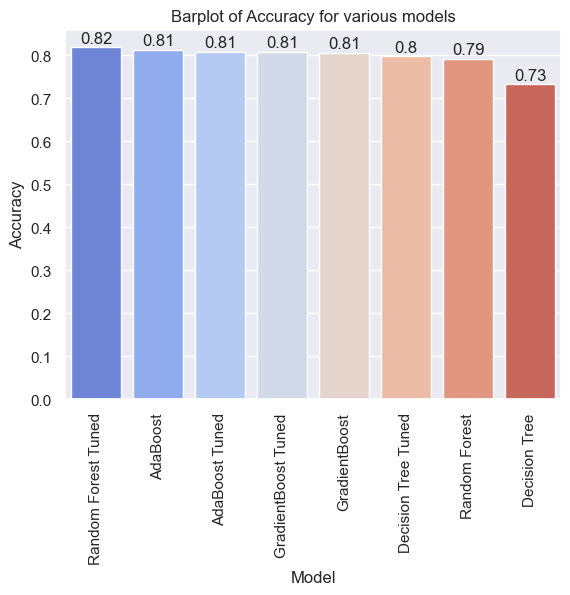

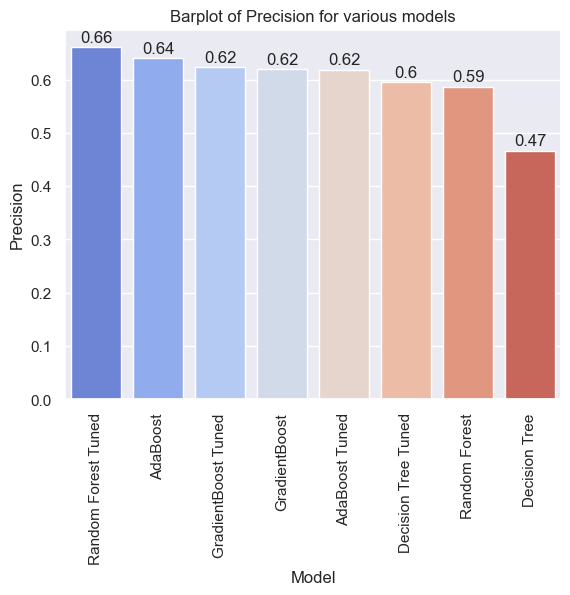

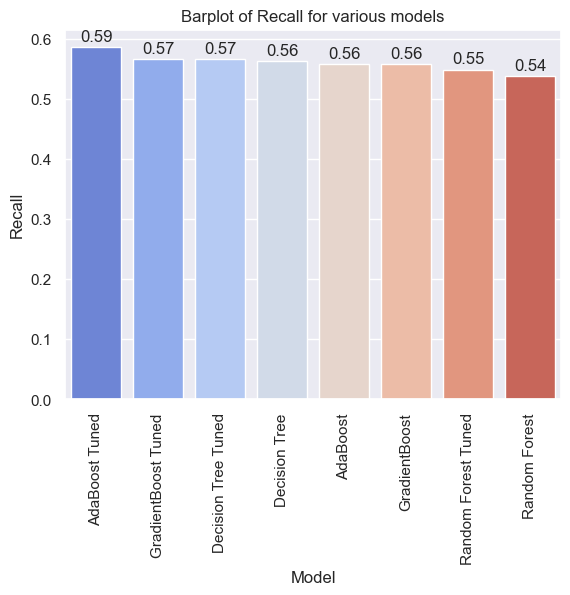

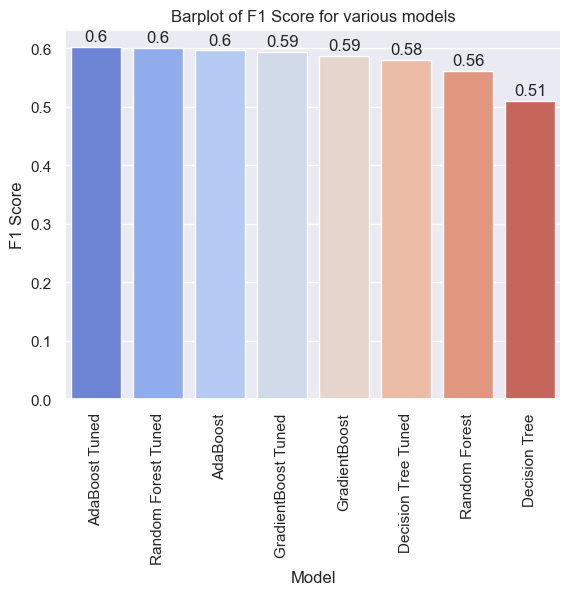

In [167]:
columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for col in columns:
    perf_df.sort_values(by=col,ascending=False,inplace=True)
    sns.set(style="darkgrid")
    _=sns.barplot(data=perf_df,x='Model',y=col,palette = 'coolwarm');
    _=plt.title('Barplot of {0} for various models'.format(col));
    _=plt.xticks(rotation=90);
    for i, v in enumerate(perf_df[col]):
        _=plt.text(i, v+0.01, str(round(v,2)), ha='center')
    _=plt.show();

**Based on the observations on the performance parameters of all the models, I believe the Adaboost model tuned using GridSerahCV has performed the best. The reasons for this conclusion are as below:**
- The model identified the most number of True Positives. It enables the telecom operator to identify the people who will churn with greater accuracy. The operator can take steps in time to retain such customers
- The model identified the least number of False Negatives. So the chances of making an error in identifying that a customer will not churn, whereas in reality he churns, are the least among all the models.
- The model has the best Recall score.
- The F1-Score of the model is also the highest. So it has a good balance between the precision and recall values
- Accuracy and Precision of the model are not the highest, but is only slightly less that the other models.
- With this model, the telecom operator can predict with good accuracy whether a customer will churn and try to retain them. The probability of the model predicting that a customer will not churn, whereas he actually churns is the least among all the models.

**The tuned Adaboost model performed the best because of the following reasons:**
- It used the following estimators
    - Decision tree
    - Logistic Regression with linear algorithm
- These estimators are simple models, but with successively fitting the residuals it could improve the performance of the final model
- In addition, running multiple iterations with various values of learning rate, number of estimators and the estimators with the help of GridSearchCV, we were able to arrive at the final model with good performance
- The final model used Logistic Regression with linear algorithm, which is a weak learner, but with a low learning rate of 0.5 it could achieve the best performance with 480 estimators
- With low weights (0.5) applied for each successive iteration of the estimator, but with higher number of iterations (480), it was able to minimize the errors and hence achieve higher accuracy

**Based on the performance and observations of the various models, we can conclude as below:**
- The following features are identified as the top factors responsible for customer churn:
    - Tenure
    - Contract
    - Monthly harges
    - Total Charges
    - Internet Service
- Default Decision Tree and Random Forest models are overfitting, but with tuning using GridSearchCV and appropriate Cross Validation value, an appropriately fitting model can be arrived at
- Boosting models by default have good performance and produce appropriately fitting models. 
- They use weak learners, but with multiple fittings on the residuals with increasing weights, these models minimize the errors and produce models with high accuracy, recall and precision
- Adaboost model in particular performs better because it can not only use Decision Tree as the estimators, but also other models like Logistic Regression, Support Vector Machines, etc
- One downside of boosting, however, is that the model building takes long time as the iterations with residuals are done sequentially. This is compensated by the good performance achieved by these models.
- By using appropriately defined weights and large number of estimators, stable models with low variance and high accuracy can be derived